# Testes Paramétricos

## Testes para Normalidade Univariada

### Amostras aleatórias para teste

In [38]:
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
np.random.seed(42)

n = 100 #tamanho 100

#amostras normais
amostra_normal1 = np.random.normal(loc=50, scale=10, size=n)
amostra_normal2 = np.random.normal(loc=100, scale=20, size=n)

#amostras não normais

#exponencial (assimétrica à direita)
amostra_nao_normal1 = np.random.exponential(scale=10, size=n)

#uniforme discreta (todos os valores no intervalo têm mesma chance)
amostra_nao_normal2 = np.random.randint(0, 100, size=n)

#binomial (distribuição discreta não normal)
amostra_nao_normal3 = np.random.binomial(n=20, p=0.3, size=n)

In [81]:
np.random.seed(42)

n = 20 #tamanho 20

#amostras normais
amostra_normal3 = np.random.normal(loc=50, scale=10, size=n)
amostra_normal4 = np.random.normal(loc=100, scale=20, size=n)

#amostras não normais

#exponencial (assimétrica à direita)
amostra_nao_normal4 = np.random.exponential(scale=5, size=n)

#uniforme discreta (todos os valores no intervalo têm mesma chance)
amostra_nao_normal5 = np.random.randint(0, 10, size=n)

#binomial (distribuição discreta não normal)
amostra_nao_normal6 = np.random.binomial(n=50, p=0.02, size=n)

### Teste de Kolmogorov-Smirnov


O **teste de K-S** é utilizado para verificar se uma amostra provém de uma população com distribuição normal $N(\mu, \sigma)$.  

**Condições de uso:**

- A média ($\mu$) e o desvio-padrão ($\sigma$) da população devem ser conhecidos.  
- Para pequenas amostras, o teste perde potência; recomenda-se seu uso para amostras grandes ($n \geq 30$).  

**Hipóteses do teste:**

$$
H_0: \text{a amostra provém de uma população com distribuição } N(\mu, \sigma)
$$

$$
H_1: \text{a amostra não provém de uma população com distribuição } N(\mu, \sigma)
$$

Seja:  

- $F_{esp}(X)$ → função de distribuição **esperada** (normal) de frequências relativas acumuladas da variável $X$, tal que $F_{esp}(X) \sim N(\mu, \sigma)$  
- $F_{obs}(X)$ → distribuição de frequências relativas acumuladas **observada** da variável $X$  

O objetivo do teste é verificar se:

$$
H_0: F_{obs}(X) = F_{esp}(X)
$$

contra a alternativa:

$$
H_1: F_{obs}(X) \neq F_{esp}(X)
$$

A estatística do teste é dada por:

$$
D_{calc} = \max \left\{
|F_{esp}(X_i) - F_{obs}(X_i)|, \; |F_{esp}(X_i) - F_{obs}(X_{i-1})|
\right\}, \quad i = 1,2,\ldots,n
$$

Onde:

- $F_{esp}(X_i)$ → frequência relativa acumulada esperada na categoria $i$  
- $F_{obs}(X_i)$ → frequência relativa acumulada observada na categoria $i$  
- $F_{obs}(X_{i-1})$ → frequência relativa acumulada observada na categoria $i-1$

Os **valores críticos** da estatística de Kolmogorov-Smirnov ($D_c$) estão disponíveis em tabelas específicas.  
Essas tabelas fornecem os valores críticos de $D_c$ tal que:

$$
P(D_{calc} > D_c) = \alpha
$$

para um **teste unilateral à direita**.

**Regra de decisão:**

- Rejeitamos a hipótese nula $H_0$ se:

$$
D_{calc} > D_c
$$

- Caso contrário, ou seja, se:

$$
D_{calc} \leq D_c
$$

não rejeitamos $H_0$.

O **p-valor** (probabilidade associada ao valor da estatística calculada $D_{calc}$) também pode ser obtido a partir de uma tabela.  
Nesse caso, rejeitamos $H_0$ se:

$$
p \leq \alpha
$$

#### Implementação do Teste de Kolmogorov Smirnov

In [41]:
def teste_kolmogorov_smirnov(amostra, is_normalized, alpha = 0.05):
    #ordenação da amostra
    amostra = np.sort(amostra)

    #tamanho da amostra, o Teste de K-S é efetivo para amostrar com n >= 30
    n = len(amostra)

    #calculando a média e o desvio_padrão da amostra
    media = np.mean(amostra)
    desvio_padrao = np.std(amostra)

    if is_normalized == False:

      #normalizando os dados
      amostra_normalizada = (amostra - media) / desvio_padrao

      #achando os valores sem repetição e normalizando-os
      valores_unicos, freq_abs_obs = np.unique(amostra, return_counts=True)
      valores_unicos_normalizados = (valores_unicos - media) / desvio_padrao

      #frequência relativa acumulada esperada na categoria i
      frq_exp = stats.norm.cdf(valores_unicos_normalizados)

      #frequência absoluta
      valores, freq_abs = np.unique(amostra_normalizada, return_counts=True)

      #probabilidade associada ao valor da estatística calculada d_calc a partir da amostra
      valor_p = stats.kstest(amostra_normalizada, 'norm')
      dados_plot = amostra

    else:

      #achando os valores sem repetição
      valores_unicos, freq_abs_obs = np.unique(amostra, return_counts=True)

      #frequência relativa acumulada esperada na categoria i
      frq_exp = stats.norm.cdf(valores_unicos)

      #Frequência absoluta
      valores, freq_abs = np.unique(amostra, return_counts=True)

      #probabilidade associada ao valor da estatística calculada d_calc a partir da amostra
      valor_p = stats.kstest(amostra, 'norm')
      dados_plot = amostra

    # Frequência relativa
    frq_rel = freq_abs / n

    #frequência relativa acumulada observada na categoria i
    frq_obs = np.cumsum(frq_rel)

    #frequência relativa acumulada observada na categoria i - 1
    frq_obs_s = np.concatenate(([0], frq_obs[:-1]))

    #diferenças entre frq_exp e frq_obs
    d_plus = np.abs(frq_exp - frq_obs)
    d_minus = np.abs(frq_exp - frq_obs_s)

    #estatística do teste (d_calculado)
    d_calc = np.max(np.concatenate([d_plus, d_minus]))

    #d_crítico
    d_crit = stats.kstwo.ppf(1 - alpha, n)

    #decisão utilizando o d_calculado e o d_crítico
    rejeita_h0 = d_calc > d_crit

    #decisão utilizando o p_value e o alpha
    rejeita_h0 = float(valor_p[1]) <= alpha

    #gráficos
    fig, axs = plt.subplots(1, 3, figsize=(13, 5))

    #histograma com curva normal
    media = np.mean(dados_plot)
    desvio = np.std(dados_plot, ddof=1)
    x = np.linspace(min(dados_plot), max(dados_plot), 200)
    y = stats.norm.pdf(x, media, desvio)

    axs[0].hist(dados_plot, bins=15, density=True, alpha=0.6, color="skyblue", edgecolor="black")
    axs[0].plot(x, y, 'r-', lw=2, label="Normal teórica")
    axs[0].set_title("Histograma com curva Normal")
    axs[0].legend()

    #função de distribuição acumulada (CDF) empírica vs normal
    axs[1].step(valores_unicos, frq_obs, where='post', label="CDF observada")
    axs[1].plot(valores_unicos, frq_exp, 'r-', lw=2, label="CDF Normal teórica")
    axs[1].set_title("Função de Distribuição Acumulada")
    axs[1].legend()

    #QQ-plot
    stats.probplot(dados_plot, dist="norm", plot=axs[2])
    axs[2].set_title("QQ-Plot (Normalidade)")

    plt.tight_layout()
    plt.show()

    return {
        'Teste': 'Kolmogorov_Smirnov',
        'Média': float(media),
        'Desvio Padrão': float(desvio_padrao),
        'D_calculado': float(d_calc),
        'D_crítico': float(d_crit),
        'P_value': float(valor_p[1]),
        'Nivel_significancia': alpha,
        'Rejeita_H0': 'Rejeitar H0' if rejeita_h0 else 'Não rejeitar H0',
        'Conclusão': 'A amostra obtida não provém de uma distribuição normal' if rejeita_h0 else 'A amostra obtida provém de uma distribuição normal'
    }

### Realizando testes de normalidade

#### Exemplo do Material

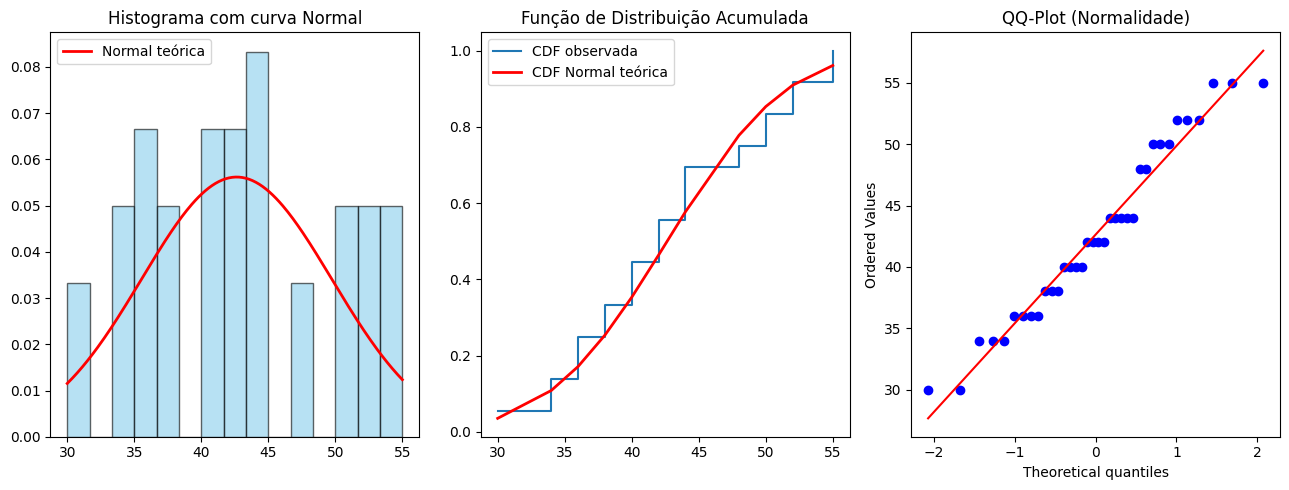

{'Teste': 'Kolmogorov_Smirnov',
 'Média': 42.638888888888886,
 'Desvio Padrão': 7.000606234771456,
 'D_calculado': 0.11736498236207304,
 'D_crítico': 0.22119076937802992,
 'P_value': 0.6611164062374637,
 'Nivel_significancia': 0.05,
 'Rejeita_H0': 'Não rejeitar H0',
 'Conclusão': 'A amostra obtida provém de uma distribuição normal'}

In [42]:
dados = [52, 50, 36, 40, 30, 42, 38, 38, 52, 44, 36, 34,50, 42, 34, 55, 36, 55, 42, 52, 34, 48, 55, 44,44, 30, 48, 40, 40, 44, 40, 44, 38, 36, 50, 42]

teste_kolmogorov_smirnov(dados, False)

In [43]:
teste = stats.kstest(dados, 'norm', args = (np.mean(dados), np.std(dados)))
print(f"D_calculado: {float(teste[0])}\nP_value: {float(teste[1])}")

D_calculado: 0.11736498236207304
P_value: 0.6611164062374637


#### Amostras aleatórias para teste



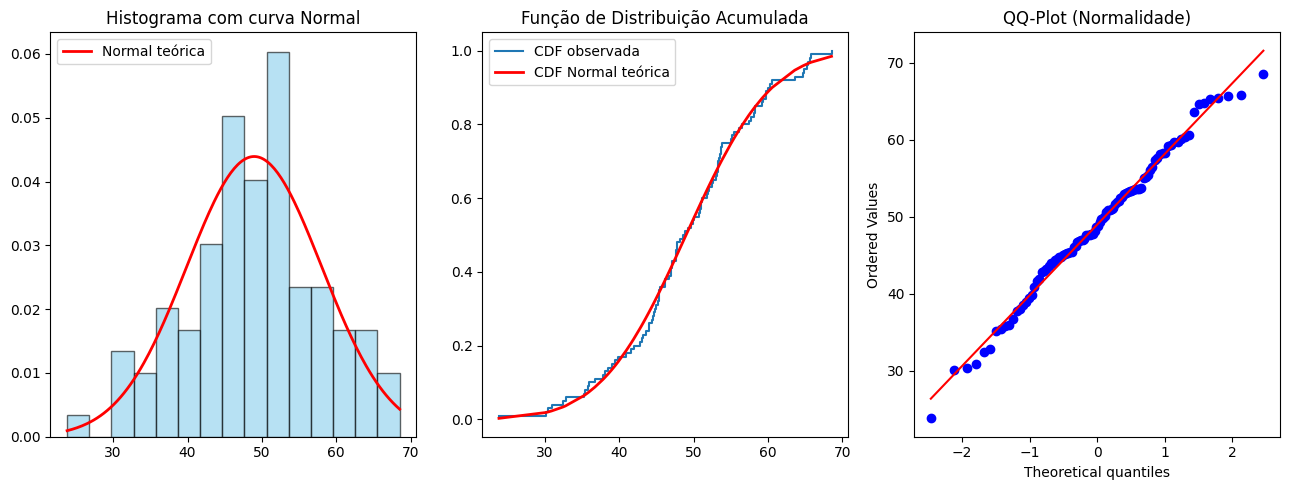

{'Teste': 'Kolmogorov_Smirnov',
 'Média': 48.96153482605906,
 'Desvio Padrão': 9.036161766446297,
 'D_calculado': 0.05082913422411503,
 'D_crítico': 0.13402791648569568,
 'P_value': 0.94670684350998,
 'Nivel_significancia': 0.05,
 'Rejeita_H0': 'Não rejeitar H0',
 'Conclusão': 'A amostra obtida provém de uma distribuição normal'}

In [82]:
teste_kolmogorov_smirnov(amostra_normal1, False)

In [45]:
teste = stats.kstest(amostra_normal1, 'norm', args = (np.mean(amostra_normal1), np.std(amostra_normal1)))
print(f"D_calculado: {float(teste[0])}\nP_value: {float(teste[1])}")

D_calculado: 0.050829134224114614
P_value: 0.946706843509984


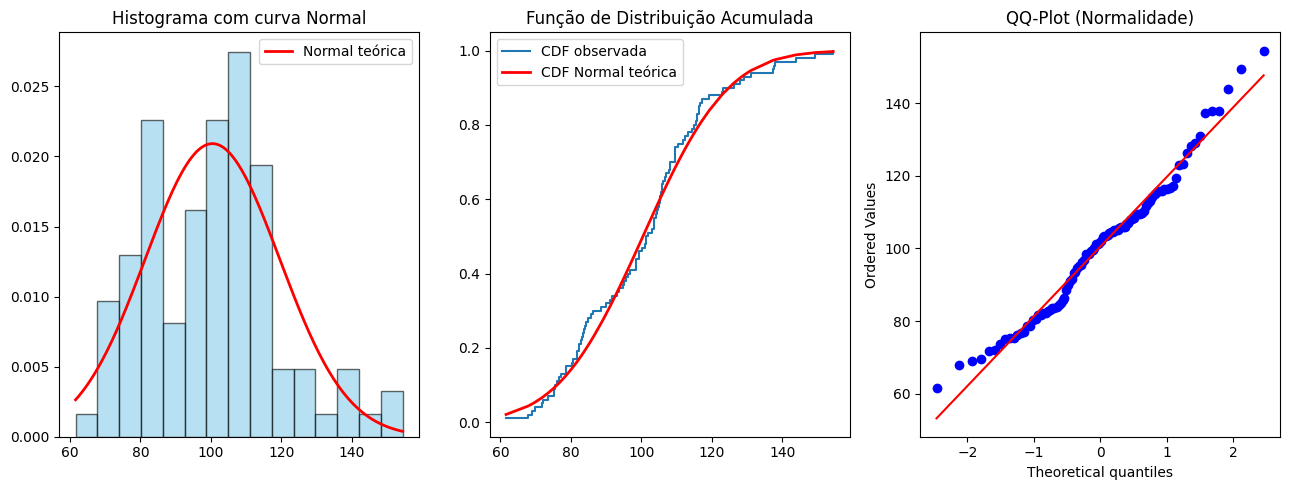

{'Teste': 'Kolmogorov_Smirnov',
 'Média': 100.44609174099845,
 'Desvio Padrão': 18.977772810212922,
 'D_calculado': 0.07327622402247314,
 'D_crítico': 0.13402791648569568,
 'P_value': 0.6293496136310635,
 'Nivel_significancia': 0.05,
 'Rejeita_H0': 'Não rejeitar H0',
 'Conclusão': 'A amostra obtida provém de uma distribuição normal'}

In [46]:
teste_kolmogorov_smirnov(amostra_normal2, False)

In [47]:
teste = stats.kstest(amostra_normal2, 'norm', args = (np.mean(amostra_normal2), np.std(amostra_normal2)))
print(f"D_calculado: {float(teste[0])}\nP_value: {float(teste[1])}")

D_calculado: 0.0732762240224733
P_value: 0.6293496136310603


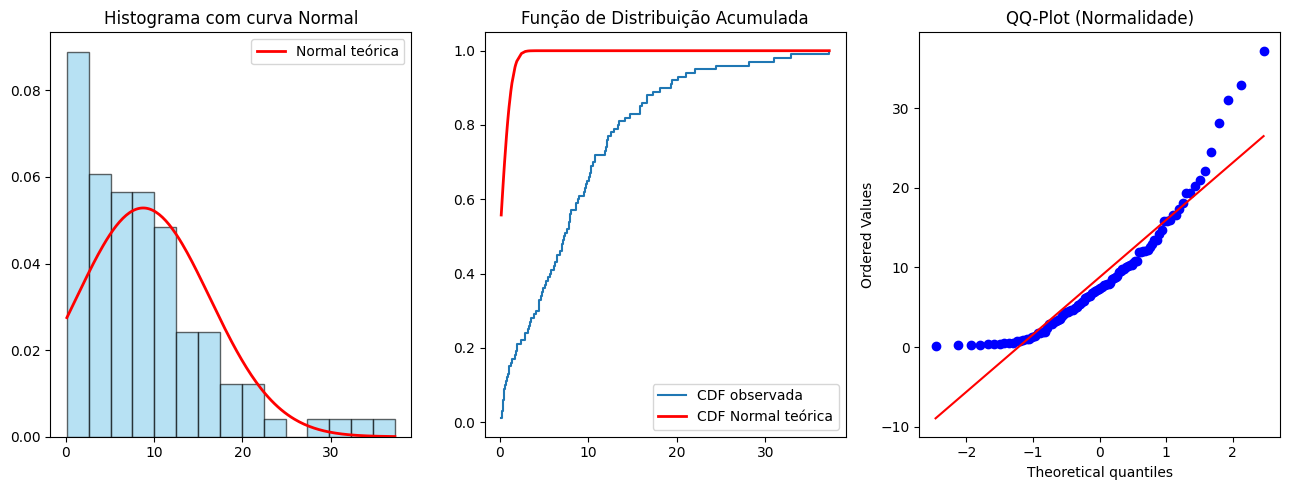

{'Teste': 'Kolmogorov_Smirnov',
 'Média': 8.771289739984928,
 'Desvio Padrão': 7.511476230696179,
 'D_calculado': 0.7855479770856364,
 'D_crítico': 0.13402791648569568,
 'P_value': 4.2521971302229406e-66,
 'Nivel_significancia': 0.05,
 'Rejeita_H0': 'Rejeitar H0',
 'Conclusão': 'A amostra obtida não provém de uma distribuição normal'}

In [48]:
teste_kolmogorov_smirnov(amostra_nao_normal1, True)

In [49]:
teste = stats.kstest(amostra_nao_normal1, 'norm')
print(f"D_calculado: {float(teste[0])}\nP_value: {float(teste[1])}")

D_calculado: 0.7855479770856364
P_value: 4.2521971302229406e-66


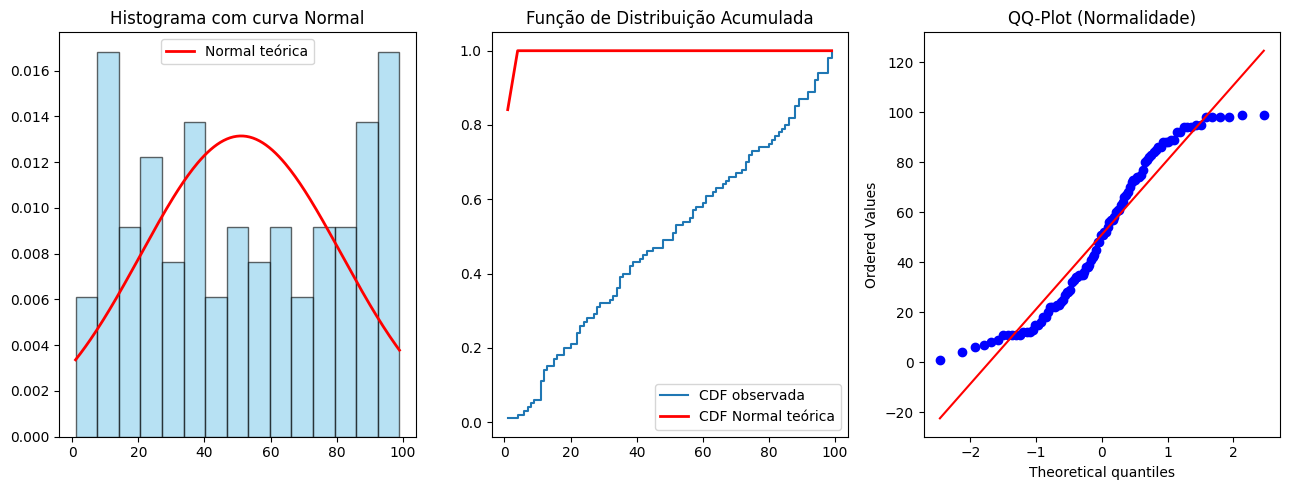

{'Teste': 'Kolmogorov_Smirnov',
 'Média': 51.11,
 'Desvio Padrão': 30.189036089282478,
 'D_calculado': 0.9899683287581669,
 'D_crítico': 0.13402791648569568,
 'P_value': 2.743841982214968e-200,
 'Nivel_significancia': 0.05,
 'Rejeita_H0': 'Rejeitar H0',
 'Conclusão': 'A amostra obtida não provém de uma distribuição normal'}

In [50]:
teste_kolmogorov_smirnov(amostra_nao_normal2, True)

In [51]:
teste = stats.kstest(amostra_nao_normal2, 'norm')
print(f"D_calculado: {float(teste[0])}\nP_value: {float(teste[1])}")

D_calculado: 0.9899683287581669
P_value: 2.743841982214968e-200


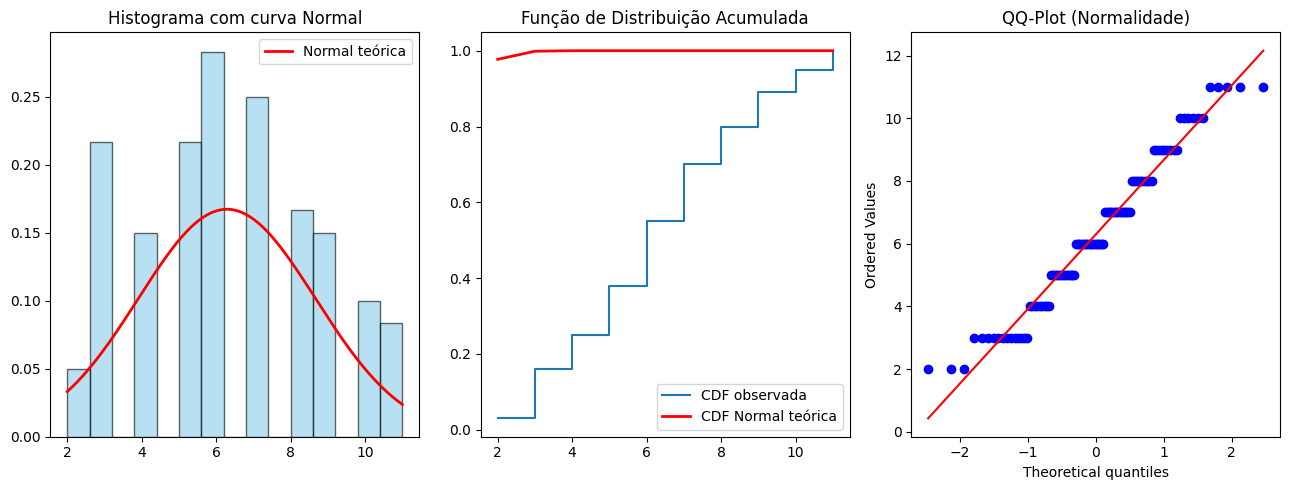

{'Teste': 'Kolmogorov_Smirnov',
 'Média': 6.29,
 'Desvio Padrão': 2.371897974197035,
 'D_calculado': 0.9772498680518208,
 'D_crítico': 0.13402791648569568,
 'P_value': 9.986699486835872e-165,
 'Nivel_significancia': 0.05,
 'Rejeita_H0': 'Rejeitar H0',
 'Conclusão': 'A amostra obtida não provém de uma distribuição normal'}

In [52]:
teste_kolmogorov_smirnov(amostra_nao_normal3, True)

In [53]:
teste = stats.kstest(amostra_nao_normal3, 'norm')
print(f"D_calculado: {float(teste[0])}\nP_value: {float(teste[1])}")

D_calculado: 0.9772498680518208
P_value: 9.986699486835872e-165


### Teste de Shapiro-Wilk

O **teste de Shapiro-Wilk (S-W)**, proposto por Shapiro e Wilk (1965), pode ser aplicado para **amostras de tamanho $4 \leq n \leq 2000$**, sendo uma alternativa ao teste de normalidade de Kolmogorov-Smirnov (K-S) em **pequenas amostras** ($n < 30$).  

Analogamente ao teste de K-S, o teste de normalidade de S-W assume as seguintes hipóteses:

$$
H_0: \text{a amostra provém de uma população com distribuição } N(\mu, \sigma)
$$

$$
H_1: \text{a amostra não provém de uma população com distribuição } N(\mu, \sigma)
$$

A estatística do teste é calculada por:

$$
W_{calc} = \frac{b^2}{\sum_{i=1}^{n} (X_i - \bar{X})^2}, \quad \text{para } i = 1, \ldots, n
$$

em que

$$
b = \sum_{i=1}^{n} a_{i,n} \left( X_{(n-i+1)} - X_{(i)} \right)
$$

Onde:

- $X_{(i)}$ → valores da amostra ordenados do menor para o maior  
- $\bar{X}$ → média da amostra  
- $a_{i,n}$ → coeficientes tabulados que dependem do tamanho da amostra $n$  
- $W_{calc}$ → estatística de Shapiro-Wilk, cujo valor próximo de 1 indica normalidade

Pequenos valores de $W_{calc}$ indicam que a distribuição da variável em estudo **não é normal**.  

Os **valores críticos** da estatística de Shapiro-Wilk ($W_c$) estão disponíveis na Tabela H.  
Diferente da maioria das tabelas, ela fornece os valores críticos de $W_c$ tal que:

$$
P(W_{calc} < W_c) = \alpha
$$

para um **teste unilateral à esquerda**.

**Regra de decisão:**

- Rejeitamos a hipótese nula $H_0$ se:

$$
W_{calc} < W_c
$$

- Caso contrário, ou seja, se:

$$
W_{calc} \geq W_c
$$

não rejeitamos $H_0$.

O **p-valor** (probabilidade associada ao valor da estatística calculada $W_{calc}$ a partir da amostra) também pode ser obtido da Tabela H1.  
Nesse caso, rejeitamos $H_0$ se:

$$
p \leq \alpha
$$

#### Tabelas

In [69]:
tabela_shapiro_wilk = {
    'tamanho_amostra': np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),

    'nivel_significancia': np.array([0.01, 0.02, 0.05, 0.10, 0.50, 0.90, 0.95, 0.98, 0.99]),

    'valores_criticos': np.array([
        [0.753, 0.758, 0.767, 0.789, 0.959, 0.998, 0.999, 1.000, 1.000],
        [0.687, 0.707, 0.748, 0.792, 0.935, 0.987, 0.992, 0.996, 0.997],
        [0.686, 0.715, 0.762, 0.806, 0.927, 0.979, 0.986, 0.991, 0.993],
        [0.713, 0.743, 0.788, 0.826, 0.927, 0.974, 0.981, 0.936, 0.989],
        [0.730, 0.760, 0.803, 0.838, 0.928, 0.972, 0.979, 0.985, 0.988],
        [0.749, 0.778, 0.818, 0.851, 0.932, 0.972, 0.978, 0.984, 0.987],
        [0.764, 0.791, 0.829, 0.859, 0.935, 0.972, 0.978, 0.984, 0.986],
        [0.781, 0.806, 0.842, 0.869, 0.938, 0.972, 0.978, 0.983, 0.986],
        [0.792, 0.817, 0.850, 0.876, 0.940, 0.973, 0.979, 0.984, 0.986],
        [0.805, 0.828, 0.859, 0.883, 0.943, 0.973, 0.979, 0.984, 0.986],
        [0.814, 0.837, 0.866, 0.889, 0.945, 0.974, 0.979, 0.984, 0.986],
        [0.825, 0.846, 0.874, 0.895, 0.947, 0.975, 0.980, 0.984, 0.986],
        [0.835, 0.855, 0.881, 0.901, 0.950, 0.976, 0.980, 0.984, 0.987],
        [0.844, 0.863, 0.887, 0.906, 0.952, 0.975, 0.981, 0.985, 0.987],
        [0.851, 0.869, 0.892, 0.910, 0.954, 0.977, 0.981, 0.985, 0.987],
        [0.858, 0.874, 0.897, 0.914, 0.956, 0.978, 0.982, 0.986, 0.988],
        [0.863, 0.879, 0.901, 0.917, 0.957, 0.978, 0.982, 0.986, 0.988],
        [0.868, 0.884, 0.905, 0.920, 0.959, 0.979, 0.983, 0.986, 0.988],
        [0.873, 0.888, 0.908, 0.823, 0.960, 0.980, 0.983, 0.987, 0.989],
        [0.878, 0.892, 0.911, 0.926, 0.961, 0.980, 0.984, 0.987, 0.989],
        [0.881, 0.895, 0.914, 0.928, 0.962, 0.981, 0.984, 0.987, 0.989],
        [0.884, 0.898, 0.916, 0.930, 0.963, 0.981, 0.984, 0.987, 0.989],
        [0.888, 0.901, 0.918, 0.931, 0.964, 0.981, 0.985, 0.988, 0.989],
        [0.891, 0.904, 0.920, 0.933, 0.965, 0.982, 0.985, 0.988, 0.989],
        [0.894, 0.906, 0.923, 0.935, 0.965, 0.982, 0.985, 0.988, 0.990],
        [0.896, 0.908, 0.924, 0.936, 0.966, 0.982, 0.985, 0.988, 0.990],
        [0.898, 0.910, 0.926, 0.937, 0.966, 0.982, 0.985, 0.988, 0.990],
        [0.900, 0.912, 0.927, 0.939, 0.967, 0.983, 0.985, 0.988, 0.900]
    ])
}

#função para acessar os valores críticos da tabela
def valor_w_critico(n, alpha):
  n_indice = np.where(tabela_shapiro_wilk['tamanho_amostra'] == n)[0][0]
  alpha_indice = np.where(tabela_shapiro_wilk['nivel_significancia'] == alpha)[0][0]

  return tabela_shapiro_wilk['valores_criticos'][n_indice, alpha_indice]

In [70]:
matriz_1_10 = np.array([
    [np.nan, 0.7071, 0.7071, 0.6872, 0.6646, 0.6431, 0.6233, 0.6052, 0.5888, 0.5739],
    [np.nan, np.nan, 0.0000, 0.1677, 0.2413, 0.2806, 0.3031, 0.3164, 0.3244, 0.3291],
    [np.nan, np.nan, np.nan, np.nan, 0.0000, 0.0875, 0.1401, 0.1743, 0.1976, 0.2141],
    [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.0000, 0.0561, 0.0947, 0.1224],
    [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.0000, 0.0399]
])

matriz_11_20 = np.array([
    [0.5601, 0.5475, 0.5359, 0.5251, 0.5150, 0.5056, 0.4968, 0.4886, 0.4808, 0.4734],
    [0.3315, 0.3325, 0.3325, 0.3318, 0.3306, 0.3290, 0.3273, 0.3253, 0.3232, 0.3211],
    [0.2260, 0.2347, 0.2412, 0.2460, 0.2495, 0.2521, 0.2540, 0.2553, 0.2561, 0.2565],
    [0.1429, 0.1586, 0.1707, 0.1802, 0.1878, 0.1939, 0.1988, 0.2027, 0.2059, 0.2085],
    [0.0695, 0.0922, 0.1099, 0.1240, 0.1353, 0.1447, 0.1524, 0.1587, 0.1641, 0.1686],
    [0.0000, 0.0303, 0.0539, 0.0727, 0.0880, 0.1005, 0.1109, 0.1197, 0.1271, 0.1334],
    [np.nan,   np.nan,   0.0000, 0.0240, 0.0433, 0.0593, 0.0725, 0.0837, 0.0932, 0.1013],
    [np.nan,   np.nan,   np.nan,   np.nan,   0.0000, 0.0196, 0.0359, 0.0496, 0.0612, 0.0711],
    [np.nan,   np.nan,   np.nan,   np.nan,   np.nan,   np.nan,   0.0000, 0.0163, 0.0303, 0.0422],
    [np.nan,   np.nan,   np.nan,   np.nan,   np.nan,   np.nan,   np.nan,   np.nan, 0.0000, 0.0140]
])

matriz_21_30 = np.array([
    [0.4643, 0.4590, 0.4542, 0.4493, 0.4450, 0.4407, 0.4366, 0.4328, 0.4291, 0.4254],
    [0.3185, 0.3156, 0.3126, 0.3098, 0.3069, 0.3043, 0.3018, 0.2992, 0.2968, 0.2944],
    [0.2578, 0.2571, 0.2563, 0.2554, 0.2543, 0.2533, 0.2522, 0.2510, 0.2499, 0.2487],
    [0.2119, 0.2131, 0.2139, 0.2145, 0.2148, 0.2151, 0.2152, 0.2151, 0.2150, 0.2148],
    [0.1736, 0.1764, 0.1787, 0.1807, 0.1822, 0.1836, 0.1848, 0.1857, 0.1864, 0.1870],
    [0.1399, 0.1443, 0.1480, 0.1512, 0.1539, 0.1563, 0.1584, 0.1601, 0.1616, 0.1630],
    [0.1092, 0.1150, 0.1201, 0.1245, 0.1283, 0.1316, 0.1346, 0.1372, 0.1395, 0.1415],
    [0.0804, 0.0878, 0.0941, 0.0997, 0.1046, 0.1089, 0.1128, 0.1162, 0.1192, 0.1219],
    [0.0530, 0.0618, 0.0696, 0.0764, 0.0823, 0.0876, 0.0923, 0.0965, 0.1002, 0.1036],
    [0.0263, 0.0368, 0.0459, 0.0539, 0.0610, 0.0672, 0.0728, 0.0778, 0.0822, 0.0862],
    [0.0000, 0.0122, 0.0228, 0.0321, 0.0403, 0.0476, 0.0540, 0.0598, 0.0650, 0.0697],
    [np.nan,   np.nan,   0.0000, 0.0107, 0.0200, 0.0284, 0.0358, 0.0424, 0.0483, 0.0537],
    [np.nan,   np.nan,   np.nan,   np.nan,   0.0000, 0.0094, 0.0178, 0.0253, 0.0320, 0.0381],
    [np.nan,   np.nan,   np.nan,   np.nan,   np.nan,   np.nan,   0.0000, 0.0084, 0.0159, 0.0227],
    [np.nan,   np.nan,   np.nan,   np.nan,   np.nan,   np.nan,   np.nan,   np.nan, 0.0000, 0.0076]
])


#### Implementação do teste de Shapiro Wilk

In [71]:
def teste_shapiro_wilk(amostra, alpha = 0.01):
    #ordenação da amostra
    amostra = np.sort(amostra)

    #tamanho da amostra, o Teste de S-W é efetivo para amostrar com n > 3 e n <= 30
    n = len(amostra)

    #calculando a média e desvio padrão da amostra
    media = np.mean(amostra)
    desvio_padrao = np.std(amostra)

    #construindo o numerador do w_calculado
    numerador = 0

    if (n >= 1 and n <= 10):

      for i in range(int(n/2)):
        numerador += matriz_1_10[i, n-1] * (amostra[n - i - 1] - amostra[i])

    elif (n >= 11 and n <= 20):

      for i in range(int(n/2)):
        numerador += matriz_11_20[i, n-11] * (amostra[n - i - 1] - amostra[i])

    elif (n >= 21 and n <= 30):
      for i in range(int(n/2)):
        numerador += matriz_21_30[i, n-21] * (amostra[n - i - 1] - amostra[i])

    #construindo o denominador do w_calculado
    denominador = np.sum((amostra - media) ** 2)

    #estatística do teste (w_calculado)
    w_calc = (numerador ** 2) / denominador

    #w_critico
    w_crit = valor_w_critico(n, alpha)

    #probabilidade associada ao valor da estatística calculada w_calc a partir da amostra
    valor_p = stats.shapiro(amostra)

    #decisão utilizando o p_value e o alpha
    rejeita_h0 = float(valor_p[1]) <= alpha

    #decisão utilizando o w_calc e o w_crit
    rejeitar_h0 = w_calc < w_crit

    #gráficos
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    #histograma + curva normal
    axs[0].hist(amostra, bins=10, density=True, alpha=0.6, color='skyblue', edgecolor='black')
    xmin, xmax = axs[0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, media, desvio_padrao)
    axs[0].plot(x, p, 'r', linewidth=2)
    axs[0].set_title("Histograma com curva Normal")

    #QQ-plot
    stats.probplot(amostra, dist="norm", plot=axs[1])
    axs[1].set_title("QQ-Plot (Normalidade)")

    plt.tight_layout()
    plt.show()

    return {
        'Teste': 'Shapiro_Wilk',
        'Media': float(media),
        'Desvio Padrão': float(desvio_padrao),
        'W_calculado': float(w_calc),
        'W_critico': float(w_crit),
        'P_value': float(valor_p[1]),
        'Nivel_significancia': alpha,
        'Rejeita_H0': 'Rejeitar H0' if rejeita_h0 else 'Não rejeitar H0',
        'Conclusão': 'A amostra obtida não provém de uma distribuição normal' if rejeita_h0 else 'A amostra obtida provém de uma distribuição normal'
    }

### Realizando testes de normalidade

#### Exemplo Material

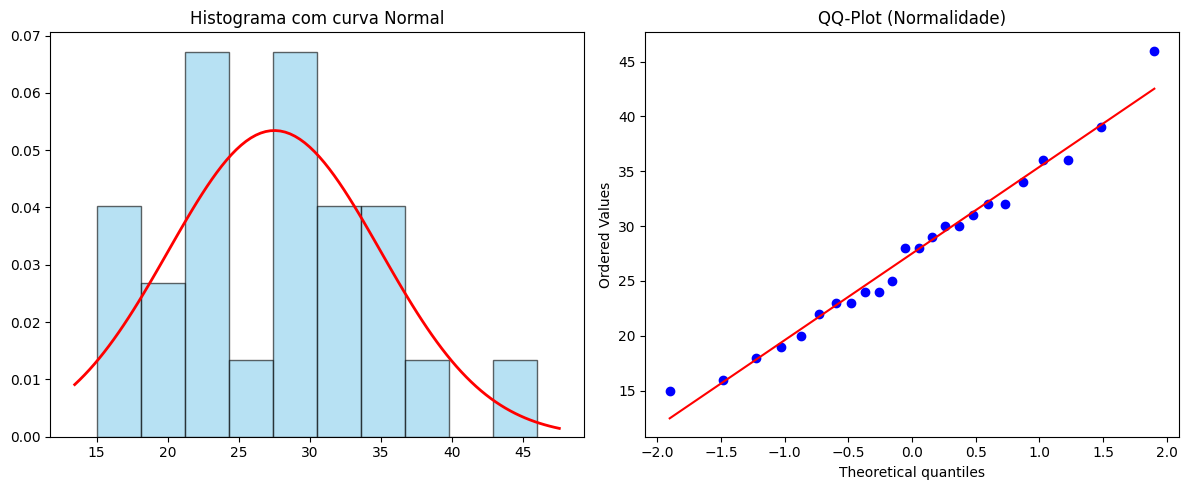

{'Teste': 'Shapiro_Wilk',
 'Media': 27.5,
 'Desvio Padrão': 7.466592261534039,
 'W_calculado': 0.9776442871823615,
 'W_critico': 0.884,
 'P_value': 0.8565108931130805,
 'Nivel_significancia': 0.01,
 'Rejeita_H0': 'Não rejeitar H0',
 'Conclusão': 'A amostra obtida provém de uma distribuição normal'}

In [57]:
dados = [15, 19, 23, 24, 28, 30, 32, 36, 16, 20, 23, 25, 29, 31, 34, 39, 18, 22, 24, 28, 30, 32, 36, 46]

teste_shapiro_wilk(dados)

In [58]:
teste = stats.shapiro(dados)
print(f"W_calculado: {float(teste[0])}\nP_value: {float(teste[1])}")

W_calculado: 0.9780083233733671
P_value: 0.8565108931130727


#### Amostras aleatórias para teste




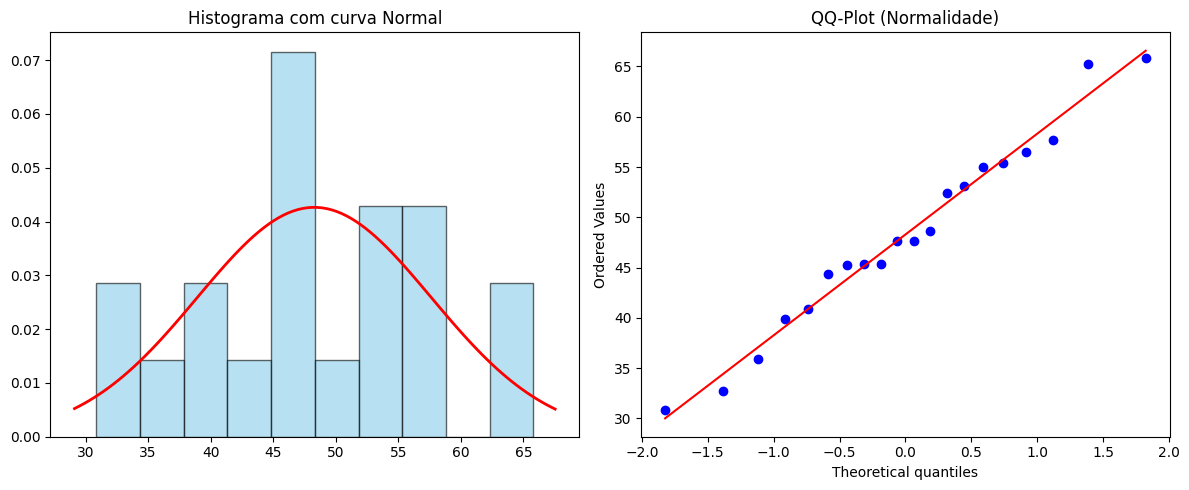

{'Teste': 'Shapiro_Wilk',
 'Media': 48.28701438558171,
 'Desvio Padrão': 9.35719958893778,
 'W_calculado': 0.9744455403560287,
 'W_critico': 0.868,
 'P_value': 0.8478800044350894,
 'Nivel_significancia': 0.01,
 'Rejeita_H0': 'Não rejeitar H0',
 'Conclusão': 'A amostra obtida provém de uma distribuição normal'}

In [83]:
teste_shapiro_wilk(amostra_normal3)

In [60]:
teste = stats.shapiro(amostra_normal3)
print(f"W_calculado: {float(teste[0])}\nP_value: {float(teste[1])}")

W_calculado: 0.9746255361563142
P_value: 0.8478800044350894


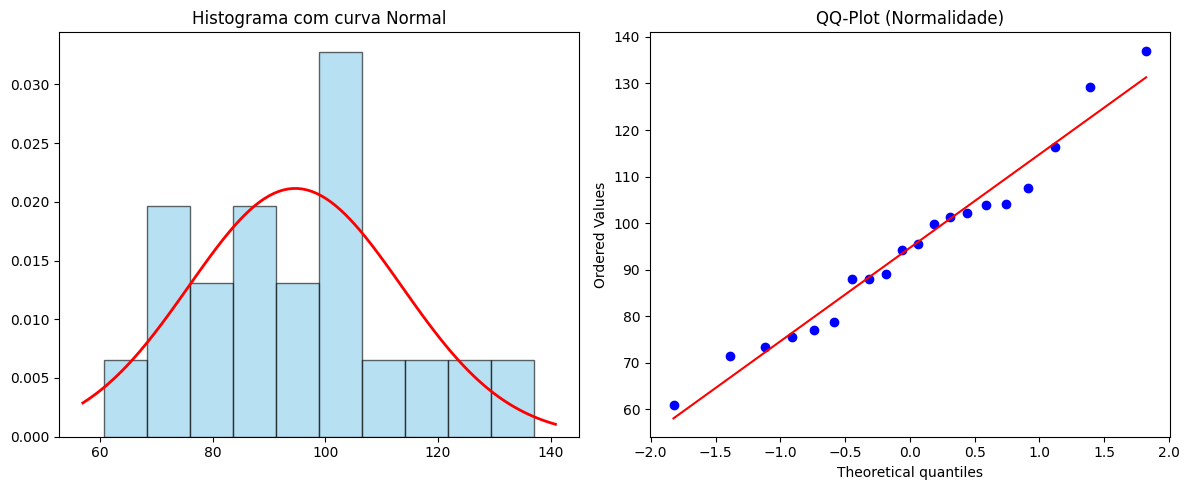

{'Teste': 'Shapiro_Wilk',
 'Media': 94.680497692119,
 'Desvio Padrão': 18.870548433118323,
 'W_calculado': 0.9705000625598413,
 'W_critico': 0.868,
 'P_value': 0.7675616535134634,
 'Nivel_significancia': 0.01,
 'Rejeita_H0': 'Não rejeitar H0',
 'Conclusão': 'A amostra obtida provém de uma distribuição normal'}

In [84]:
teste_shapiro_wilk(amostra_normal4)

In [62]:
teste = stats.shapiro(amostra_normal4)
print(f"W_calculado: {float(teste[0])}\nP_value: {float(teste[1])}")

W_calculado: 0.9706031576175146
P_value: 0.7675616535134634


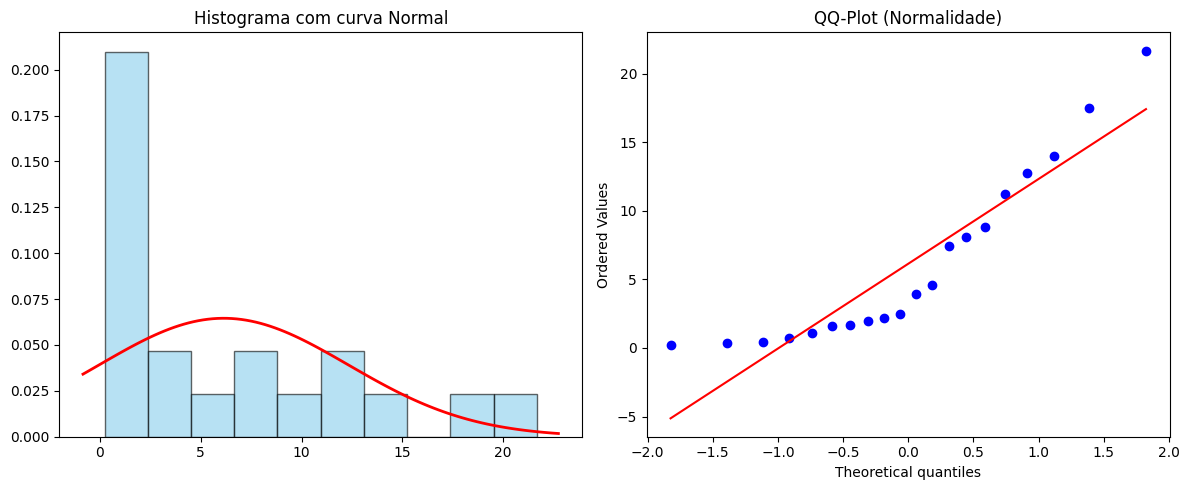

{'Teste': 'Shapiro_Wilk',
 'Media': 6.141020599884241,
 'Desvio Padrão': 6.179795567000024,
 'W_calculado': 0.8483422505732618,
 'W_critico': 0.868,
 'P_value': 0.005010651233784284,
 'Nivel_significancia': 0.01,
 'Rejeita_H0': 'Rejeitar H0',
 'Conclusão': 'A amostra obtida não provém de uma distribuição normal'}

In [85]:
teste_shapiro_wilk(amostra_nao_normal4)

In [64]:
teste = stats.shapiro(amostra_nao_normal4)
print(f"W_calculado: {float(teste[0])}\nP_value: {float(teste[1])}")

W_calculado: 0.8483941778121169
P_value: 0.005010651233784291


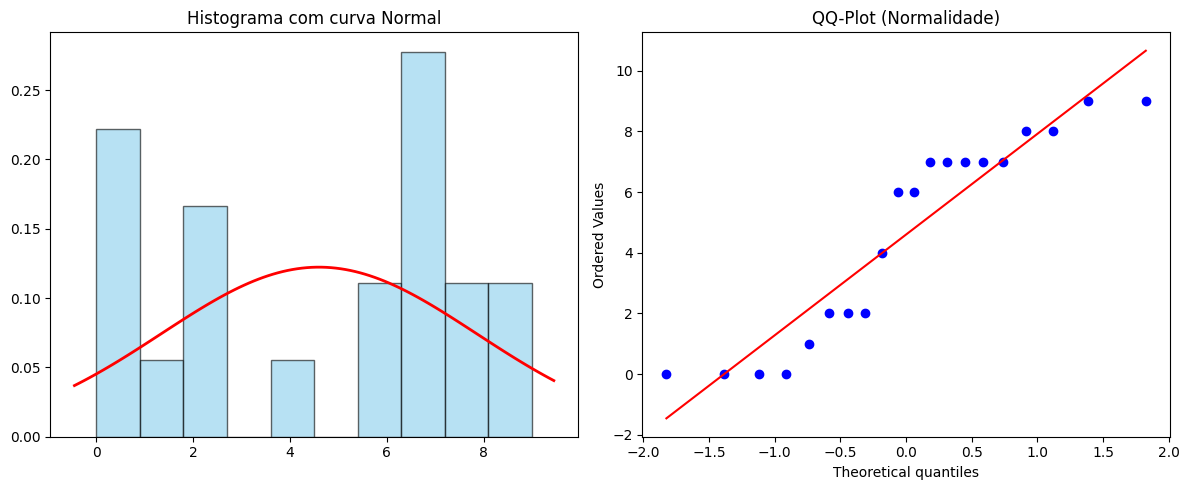

{'Teste': 'Shapiro_Wilk',
 'Media': 4.6,
 'Desvio Padrão': 3.2619012860600183,
 'W_calculado': 0.8612280135808267,
 'W_critico': 0.868,
 'P_value': 0.008290989119209512,
 'Nivel_significancia': 0.01,
 'Rejeita_H0': 'Rejeitar H0',
 'Conclusão': 'A amostra obtida não provém de uma distribuição normal'}

In [86]:
teste_shapiro_wilk(amostra_nao_normal5)

In [66]:
teste = stats.shapiro(amostra_nao_normal5)
print(f"W_calculado: {float(teste[0])}\nP_value: {float(teste[1])}")

W_calculado: 0.8612959413450623
P_value: 0.008290989119209446


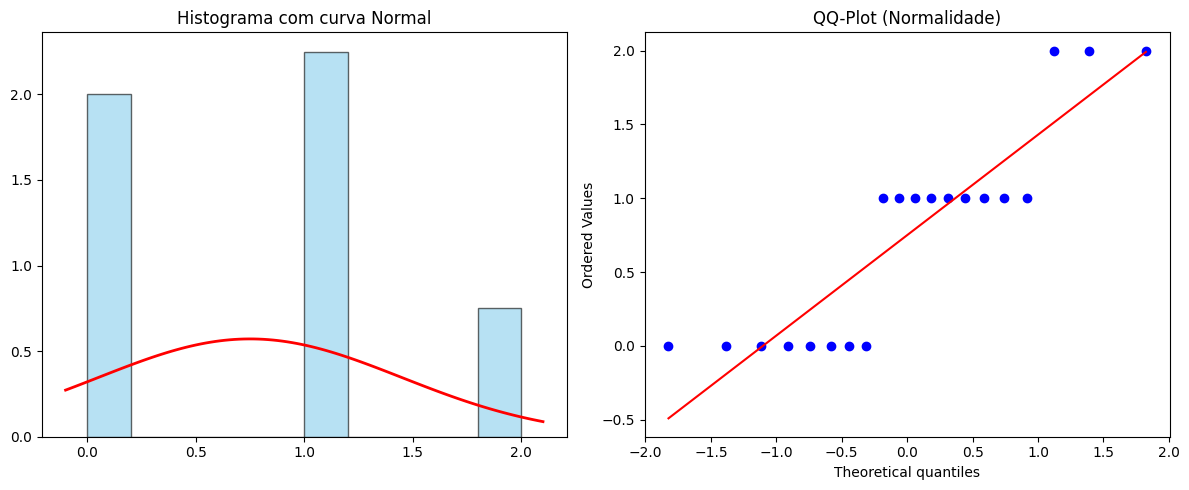

{'Teste': 'Shapiro_Wilk',
 'Media': 0.75,
 'Desvio Padrão': 0.698212002188447,
 'W_calculado': 0.7954531292307693,
 'W_critico': 0.868,
 'P_value': 0.0007387141544039175,
 'Nivel_significancia': 0.01,
 'Rejeita_H0': 'Rejeitar H0',
 'Conclusão': 'A amostra obtida não provém de uma distribuição normal'}

In [87]:
teste_shapiro_wilk(amostra_nao_normal6)

In [68]:
teste = stats.shapiro(amostra_nao_normal6)
print(f"W_calculado: {float(teste[0])}\nP_value: {float(teste[1])}")

W_calculado: 0.7954154999895621
P_value: 0.0007387141544039175


## Testes Para Homogenidade de Variâncias

Uma das condições para a aplicação de um **teste paramétrico para comparação de k médias populacionais** é que as variâncias das populações,
estimadas a partir de k amostras representativas, sejam homogêneas ou iguais.  

Os testes mais utilizados para a verificação da homogeneidade de variâncias são:

- **Teste χ² de Bartlett (1937)**  
- **Teste C de Cochran (1947)**  
- **Teste F<sub>max</sub> de Hartley (1950)**  
- **Teste F de Levene (1960)**  

Na hipótese nula dos testes de homogeneidade de variância, assume-se que as variâncias das k populações são homogêneas.  
Já na hipótese alternativa, pelo menos uma variância populacional difere das demais.  

**Matematicamente:**

$$H_0: \sigma_1^2 = \sigma_2^2 = \sigma_3^2 = \cdots = \sigma_n^2$$  

$$H_1: \exists \ i,j \ \ ; \ \sigma_i^2 \neq \sigma_j^2 \quad (i,j = 1,2, \ldots, n)$$

### Teste X² de Bartlett

O **teste original** proposto para verificar a homogeneidade de variâncias entre grupos é o **teste χ² de Bartlett (1937)**.  
Esse teste, entretanto, é muito sensível aos desvios de normalidade, sendo o **teste de Levene** uma alternativa mais robusta nesse caso.

A estatística de Bartlett é calculada a partir de $q$:

$$
q = (N - k) \cdot \log(S_p^2) - \sum_{i=1}^{k} (n_i - 1) \cdot \log(S_i^2)
$$

Onde:

- $n_i, \ i = 1, \ldots, k$ → tamanho de cada amostra $i$, de modo que $\sum_{i=1}^{k} n_i = N$  
- $S_i^2, \ i = 1, \ldots, k$ → variância da amostra $i$  
- $S_p^2$ → variância agrupada (pooled variance), definida como:

$$
S_p^2 = \frac{\sum_{i=1}^{k} (n_i - 1) \, S_i^2}{N - k}
$$

Um fator de correção $c$ é aplicado à estatística $q$, definido por:

$$
c = 1 + \frac{1}{3(k-1)} \left( \sum_{i=1}^{k} \frac{1}{n_i - 1} \; - \; \frac{1}{N - k} \right)
$$

Assim, a estatística de Bartlett ($B_{calc}$) é dada por:

$$
B_{calc} = \frac{q}{c}
$$

A qual segue, aproximadamente, uma distribuição qui-quadrado com $k - 1$ graus de liberdade:

$$
B_{calc} \sim \chi^2_{k-1}
$$

Assim, rejeitamos a hipótese nula se:

$$
B_{calc} > \chi^2_c
$$

Por outro lado, se:

$$
B_{calc} \leq \chi^2_c
$$

não rejeitamos $H_0$.

O **p-valor** (probabilidade associada à estatística $\chi^2_{calc}$) também pode ser obtido a partir da Tabela da distribuição qui-quadrado.  

Nesse caso, rejeitamos $H_0$ se:

$$
p \leq \alpha
$$

#### Implementação do Teste X² de Bartlett

In [32]:
def teste_x2_bartlett(*amostra):
  amostra = [list(dados) for dados in amostra]

  #nível de significância
  alpha = 0.05

  #quantidade de amostras
  k = len(amostra)

  #média e desvio padrão de cada amostra
  medias_amostras = [np.mean(dados) for dados in amostra]
  desvios_padroes_amostras = [np.std(dados) for dados in amostra]

  #tamanho de cada amostra
  tamanhos_amostras = [len(amostra) for amostra in amostra]

  #soma dos tamanhos das amostras
  N = sum(tamanhos_amostras)

  #variância de cada amostra
  variancias_amostrais = [np.var(a, ddof=1) for a in amostra]

  #calculando S²p
  numerador = 0
  for i in range (k):
    numerador += (tamanhos_amostras[i] - 1) * variancias_amostrais[i]

  S2p = numerador/(N - k)

  #calculando q
  somatorio = 0
  for i in range (k):
    somatorio += (tamanhos_amostras[i] - 1) * np.log(variancias_amostrais[i])

  q = (N - k) * (np.log(S2p)) - somatorio

  #calculando c
  somatorio = 0
  for i in range (k):
    somatorio += (1/(tamanhos_amostras[i] - 1))

  c =  1 + (1 / (3 * (k - 1))) * (somatorio - (1 / (N - k)))

  #calculando a estatística b_calculado
  b_calc = q/c

  #determinando os graus de liberdade
  graus_liberdade = k - 1

  #calculando valor p
  valor_p = 1 - stats.chi2.cdf(b_calc, graus_liberdade)

  #calculndo o b_crítico
  b_crit = stats.chi2.ppf(1 - alpha, graus_liberdade)

  #decisão utilizando o b_calc e o b_crit
  rejeita_h0 = b_calc > b_crit

  #decisão utilizando o p_value e o alpha
  rejeita_h0 = valor_p <= alpha

  fig, axs = plt.subplots(1, 2, figsize=(14,5))

  # Boxplot
  axs[0].boxplot(amostra, tick_labels=[f"Amostra {i+1}" for i in range(k)], patch_artist=True)
  axs[0].set_title('Boxplot das Amostras')
  axs[0].set_ylabel('Valores')

  # Gráfico de densidade (KDE)
  for i, a in enumerate(amostra):
    sns.kdeplot(a, ax=axs[1], label=f"Amostra {i+1}", fill=True, alpha=0.3)
    axs[1].set_title('Gráfico de Densidade (KDE) das Amostras')
    axs[1].set_xlabel('Valores')
    axs[1].set_ylabel('Densidade')
    axs[1].legend()

  plt.tight_layout()
  plt.show()

  return {
        'Teste': 'X² Bartlett',
        'B_calculado': float(b_calc),
        'B_critico': float(b_crit),
        'P_value': float(valor_p),
        'Nivel_significancia': alpha,
        'Rejeita_H0': 'Rejeitar H0' if rejeita_h0 else 'Não rejeitar H0',
        'Conclusão': 'Pelo menos uma variância populacional é diferente das demais' if rejeita_h0 else 'As variâncias das k populações são homogêneas'
    }

### Realizando Teste de Homogenidade

#### Exemplo Material

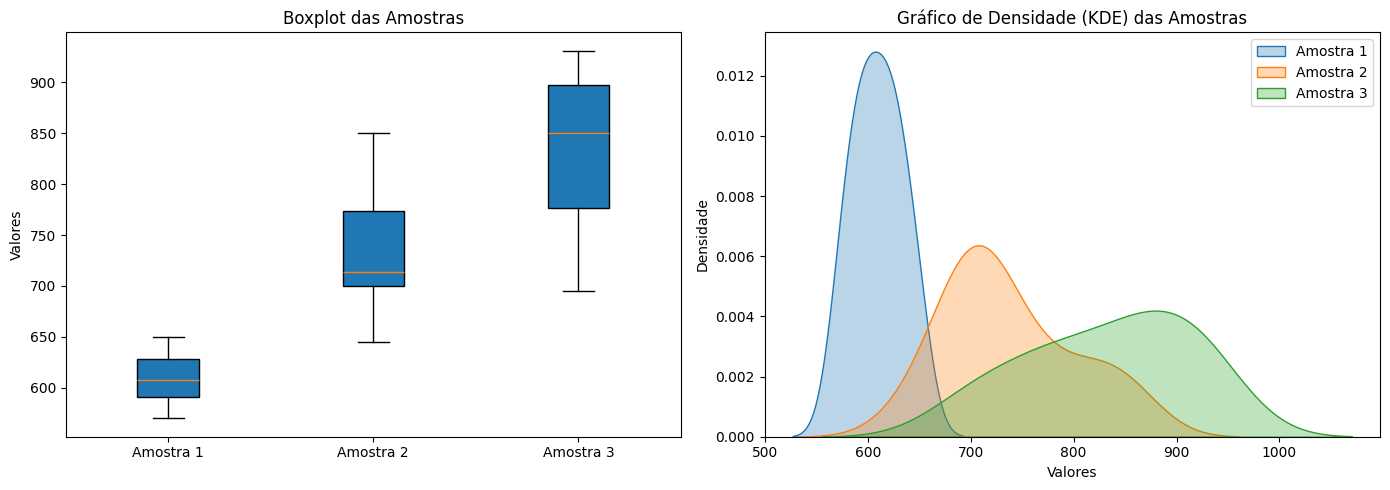

{'Teste': 'X² Bartlett',
 'B_calculado': 14.442570177093907,
 'B_critico': 5.991464547107979,
 'P_value': 0.0007308625919830725,
 'Nivel_significancia': 0.05,
 'Rejeita_H0': 'Rejeitar H0',
 'Conclusão': 'Pelo menos uma variância populacional é diferente das demais'}

In [33]:
dados1 = [620, 630, 610, 650, 585, 590, 630, 644, 595, 603, 570, 605, 622, 578]
dados2 = [710, 780, 810, 755, 699, 680, 710, 850, 844, 730, 645, 688, 718, 702]
dados3 = [924, 695, 854, 802, 931, 924, 847, 800, 769, 863, 901, 888, 757, 712]

teste_x2_bartlett(dados1, dados2, dados3)

#### Amostras aleatórias para teste

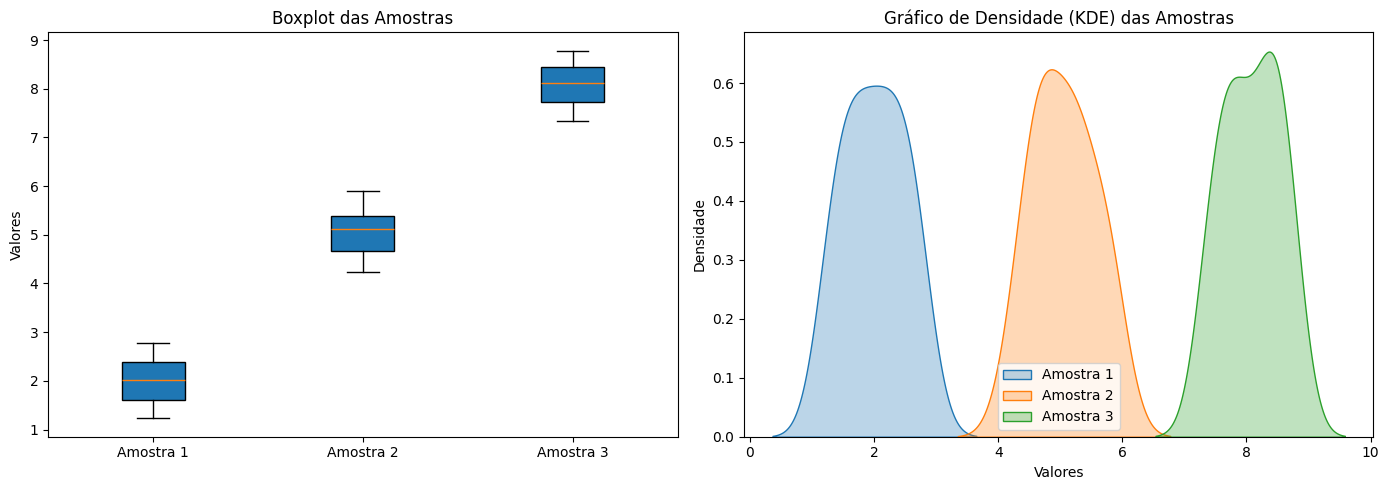

{'Teste': 'X² Bartlett',
 'B_calculado': 0.12281952686128803,
 'B_critico': 5.991464547107979,
 'P_value': 0.9404378037918282,
 'Nivel_significancia': 0.05,
 'Rejeita_H0': 'Não rejeitar H0',
 'Conclusão': 'As variâncias das k populações são homogêneas'}

In [88]:
amostra1 = [2.34, 1.89, 2.67, 1.45, 2.12, 1.78, 2.56, 1.23, 2.01, 1.67, 2.45, 1.34, 2.23, 1.56, 2.78]
amostra2 = [5.12, 4.67, 5.45, 4.23, 5.78, 4.89, 5.34, 4.56, 5.67, 4.78, 5.23, 4.45, 5.89, 4.67, 5.12]
amostra3 = [8.45, 7.89, 8.67, 7.56, 8.23, 7.78, 8.56, 7.45, 8.34, 7.67, 8.78, 7.89, 8.12, 7.34, 8.45]

teste_x2_bartlett(amostra1, amostra2, amostra3)

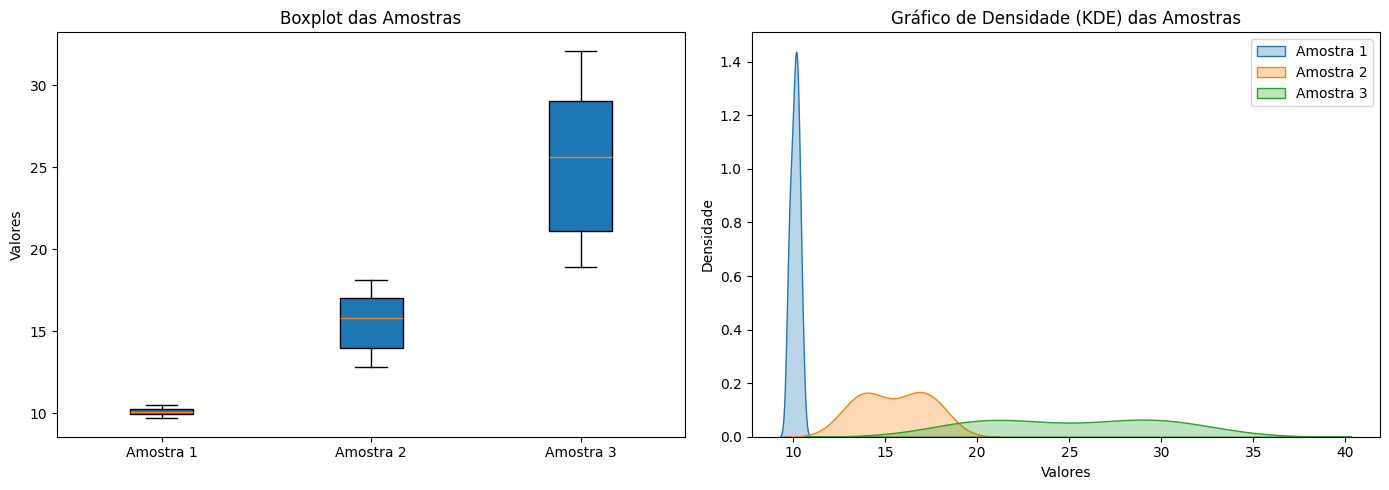

{'Teste': 'X² Bartlett',
 'B_calculado': 68.76981279586016,
 'B_critico': 5.991464547107979,
 'P_value': 1.2212453270876722e-15,
 'Nivel_significancia': 0.05,
 'Rejeita_H0': 'Rejeitar H0',
 'Conclusão': 'Pelo menos uma variância populacional é diferente das demais'}

In [89]:
amostra1 = [10.2, 10.5, 9.8, 10.1, 10.3, 9.9, 10.4, 10.0, 10.2, 10.1, 9.7, 10.3, 10.0, 10.2, 9.8]
amostra2 = [15.8, 13.2, 17.4, 14.6, 16.9, 12.8, 18.1, 13.9, 17.2, 14.3, 16.5, 13.7, 17.8, 14.1, 16.2]
amostra3 = [25.6, 19.8, 30.2, 22.4, 28.7, 18.9, 32.1, 21.5, 29.4, 20.7, 27.8, 19.2, 31.5, 22.8, 28.3]

teste_x2_bartlett(amostra1, amostra2, amostra3)

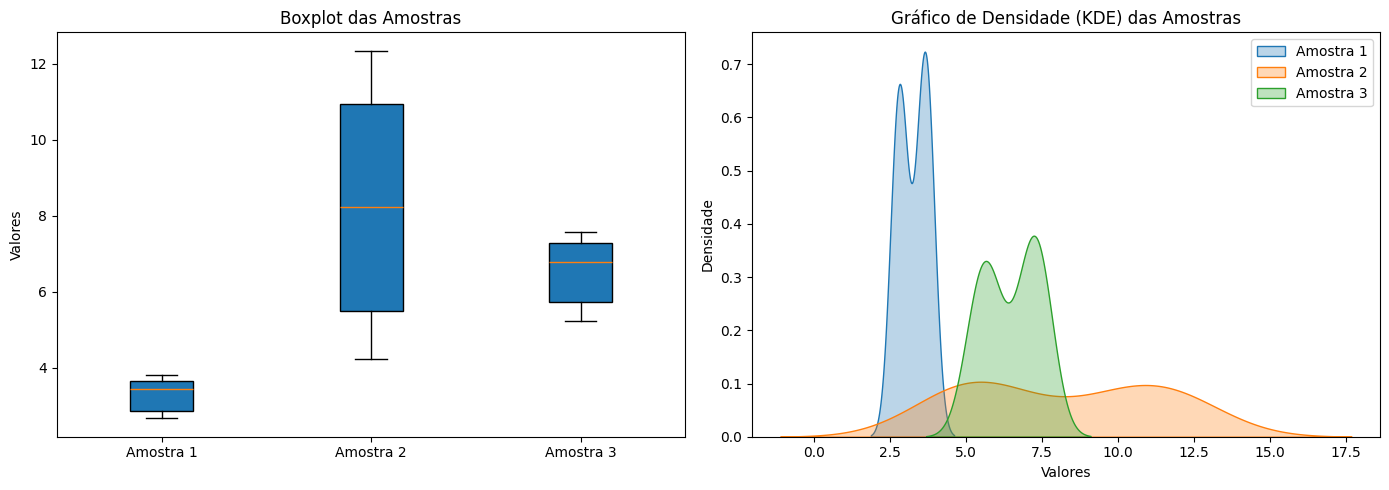

{'Teste': 'X² Bartlett',
 'B_calculado': 44.816845808154206,
 'B_critico': 5.991464547107979,
 'P_value': 1.854153497404809e-10,
 'Nivel_significancia': 0.05,
 'Rejeita_H0': 'Rejeitar H0',
 'Conclusão': 'Pelo menos uma variância populacional é diferente das demais'}

In [91]:
amostra1 = [3.45, 2.89, 3.78, 2.67, 3.56, 2.94, 3.82, 2.73, 3.61, 2.85, 3.72, 2.68, 3.53, 2.91, 3.79]
amostra2 = [8.23, 4.56, 11.45, 5.89, 10.12, 4.23, 12.34, 6.12, 9.87, 5.34, 11.78, 5.67, 10.45, 4.89, 12.01]
amostra3 = [6.78, 5.34, 7.45, 5.89, 7.12, 5.67, 7.34, 5.23, 7.01, 5.78, 7.56, 5.45, 7.23, 5.91, 7.45]

teste_x2_bartlett(amostra1, amostra2, amostra3)

## Testes de Hipóteses sobre uma média populacional(µ) a partir de uma amostra aleatória

### Teste Z para Média populacional (σ conhecido)

Este teste é aplicado quando uma amostra aleatória de tamanho $n$ é extraída de uma população com **distribuição normal**, **média desconhecida ($\mu$)** e **desvio-padrão conhecido ($\sigma$)**.  

Caso a distribuição da população **não seja conhecida**, é necessário trabalhar com **amostras grandes ($n > 30$)**, pois o **Teorema do Limite Central** garante que a distribuição amostral da média se aproxima de uma normal à medida que $n$ cresce.  

#### Hipóteses do teste (bilateral)

$$
H_0: \mu = \mu_0
$$

$$
H_1: \mu \neq \mu_0
$$

#### Estatística do teste

A estatística utilizada refere-se à **média amostral** $\bar{X}$, padronizada para comparação com valores tabelados:

$$
Z_{calc} = \frac{\bar{X} - \mu_0}{\sigma_{\bar{X}}} \sim N(0,1)
$$

onde:

$$
\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}
$$

#### Valores críticos e região de rejeição

Os **valores críticos** $Z_c$ estão disponíveis na Tabela E do apêndice.  
- Para um **teste unilateral à direita**:

$$
P(Z_{calc} > Z_c) = \alpha
$$

- Para um **teste bilateral**:

$$
P(Z_{calc} > Z_c) = \frac{\alpha}{2}, \quad \text{pois } P(Z_{calc} < -Z_c) + P(Z_{calc} > Z_c) = \alpha
$$

A hipótese nula $H_0$ é **rejeitada** se:

$$
Z_{calc} < -Z_c \quad \text{ou} \quad Z_{calc} > Z_c
$$

Caso contrário, **não rejeitamos $H_0$**.

#### P-valor

As probabilidades unilaterais associadas à estatística $Z_{calc}$ podem ser obtidas a partir da Tabela E:

- Para um **teste unilateral**: $P = P_1$  
- Para um **teste bilateral**: $P = 2 \cdot P_1$  

A regra de decisão: **rejeitar $H_0$ se $P \leq \alpha$**.

In [110]:
def teste_z_media_populacional(amostra, media_hip, desvio_padrao, lateral):
  alpha = 0.05

  tamanho_amostra = len(amostra)

  media_amostral = np.mean(amostra)

  dp_x_barra = desvio_padrao / np.sqrt(tamanho_amostra)

  z_calc = (media_amostral - media_hip) / dp_x_barra

  if lateral == 'Bilateral':
        valor_p = 2 * (1 - stats.norm.cdf(abs(z_calc)))
  elif lateral == 'Unilateral':
        valor_p = 1 - stats.norm.cdf(z_calc) if z_calc > 0 else stats.norm.cdf(z_calc)

  if lateral == "Bilateral":
      z_crit = stats.norm.ppf(1 - alpha/2)
      rejeita_h0 = abs(z_calc) > z_crit
  elif lateral == "Unilateral":
      z_crit = stats.norm.ppf(1 - alpha) if z_calc > 0 else stats.norm.ppf(alpha)
      rejeita_h0 = z_calc > z_crit if z_calc > 0 else z_calc < z_crit

  #gráfico
  x = np.linspace(-4, 4, 1000)
  y = stats.norm.pdf(x, 0, 1)
  plt.figure(figsize=(10,5))
  plt.plot(x, y, label='Distribuição Normal Padrão')

  #região de rejeição
  if lateral == 'Bilateral':
      plt.fill_between(x, 0, y, where=(x <= -z_crit) | (x >= z_crit), color='red', alpha=0.3, label='Região de Rejeição')
  elif lateral == 'Unilateral':
      if z_calc > 0:
          plt.fill_between(x, 0, y, where=(x >= z_crit), color='red', alpha=0.3, label='Região de Rejeição')
      else:
          plt.fill_between(x, 0, y, where=(x <= z_crit), color='red', alpha=0.3, label='Região de Rejeição')

  plt.axvline(z_calc, color='green', linestyle='--', label=f'Z calculado = {z_calc:.2f}')
  plt.axvline(z_crit, color='red', linestyle='--', label=f'Z crit = {z_crit:.2f}')

  if(lateral == 'Bilateral'):
    plt.axvline(-z_crit, color='red', linestyle='--', label=f'Z crit = {-z_crit:.2f}')

  plt.title(f'Teste Z para Média Populacional ({lateral})')
  plt.xlabel('Z')
  plt.ylabel('Densidade')
  plt.legend()
  plt.grid(True)
  plt.show()

  return {
        'Teste': 'Z Média Populacional',
        'Média': float(media_amostral),
        'Z_calculado': float(z_calc),
        'Z_critico': float(z_crit),
        'P_value': float(valor_p),
        'Nivel_significancia': alpha,
        'Rejeita_H0': 'Rejeitar H0' if rejeita_h0 else 'Não rejeitar H0',
        'Conclusão': f'A amostra não provém de uma população com determinada média {media_hip}' if rejeita_h0 else f'A amostra provém de uma população com determinada média {media_hip}'
    }

### Realizando Teste de Hipótese para Média

#### Exemplo Material

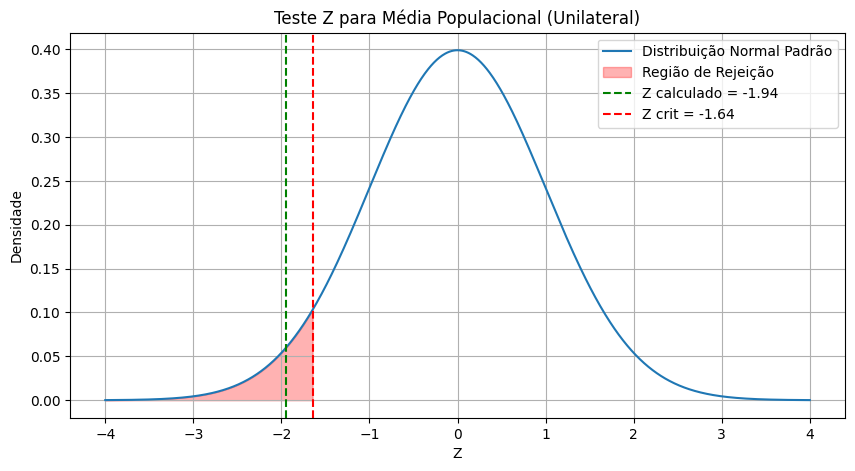

{'Teste': 'Z Média Populacional',
 'Z_calculado': -1.9442222095223598,
 'Z_critico': -1.6448536269514729,
 'P_value': 0.02593433032596907,
 'Nivel_significancia': 0.05,
 'Rejeita_H0': 'Rejeitar H0',
 'Conclusão': 'A amostra não provém de uma população com determinada média 4.2'}

In [35]:
teste_z_media_populacional(4.2, 'Unilateral')

#### Amostras aleatórias para teste

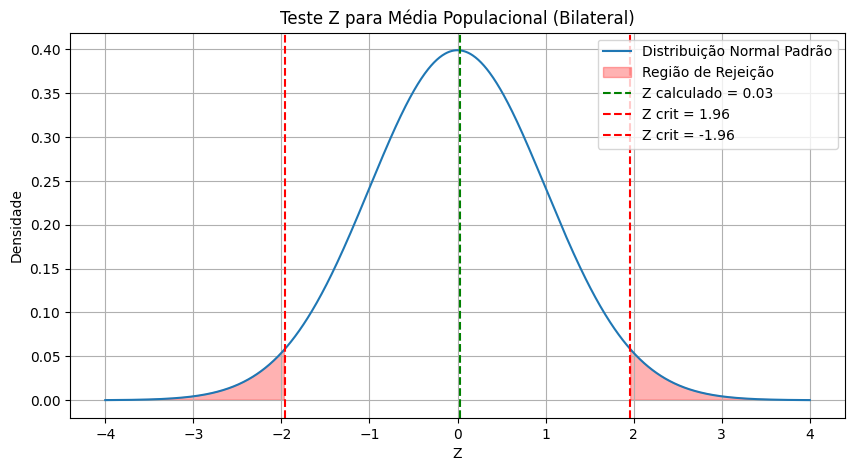

{'Teste': 'Z Média Populacional',
 'Média': 100.08666666666666,
 'Z_calculado': 0.031646192211406764,
 'Z_critico': 1.959963984540054,
 'P_value': 0.9747542057625378,
 'Nivel_significancia': 0.05,
 'Rejeita_H0': 'Não rejeitar H0',
 'Conclusão': 'A amostra provém de uma população com determinada média 100'}

In [111]:
amostra = [102.3, 97.8, 103.5, 98.2, 101.7, 96.4, 104.1, 99.6, 100.8, 95.9,
            103.2, 98.7, 101.4, 97.1, 102.9, 99.3, 100.5, 96.8, 103.8, 98.5,
            101.1, 97.4, 102.6, 99.1, 100.2, 96.1, 104.3, 99.8, 101.9, 97.6]

teste_z_media_populacional(amostra, 100, 15, 'Bilateral')

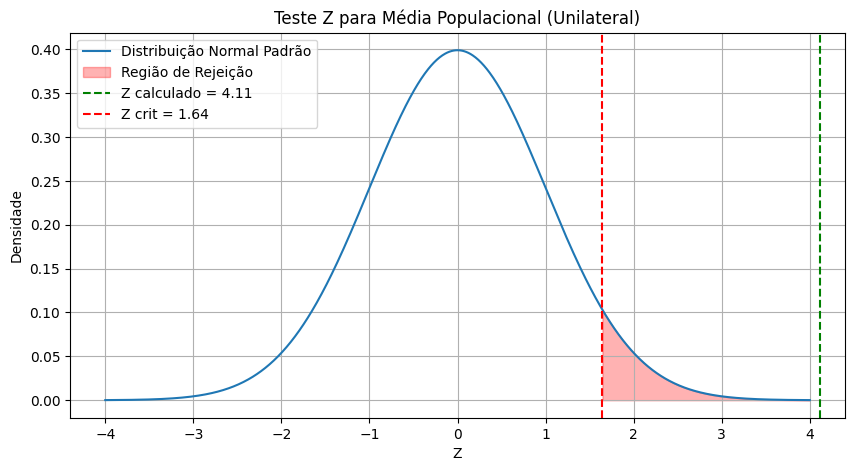

{'Teste': 'Z Média Populacional',
 'Média': 56.583999999999996,
 'Z_calculado': 4.1149999999999975,
 'Z_critico': 1.6448536269514722,
 'P_value': 1.9358970736571557e-05,
 'Nivel_significancia': 0.05,
 'Rejeita_H0': 'Rejeitar H0',
 'Conclusão': 'A amostra não provém de uma população com determinada média 50'}

In [112]:
amostra = [56.8, 54.3, 58.1, 55.6, 57.4, 53.9, 59.2, 56.1, 57.8, 54.7,
            58.5, 55.3, 57.1, 53.6, 58.9, 56.4, 57.6, 54.1, 59.4, 55.9,
            57.3, 53.8, 58.7, 56.2, 57.9]

teste_z_media_populacional(amostra, 50, 8, 'Unilateral')

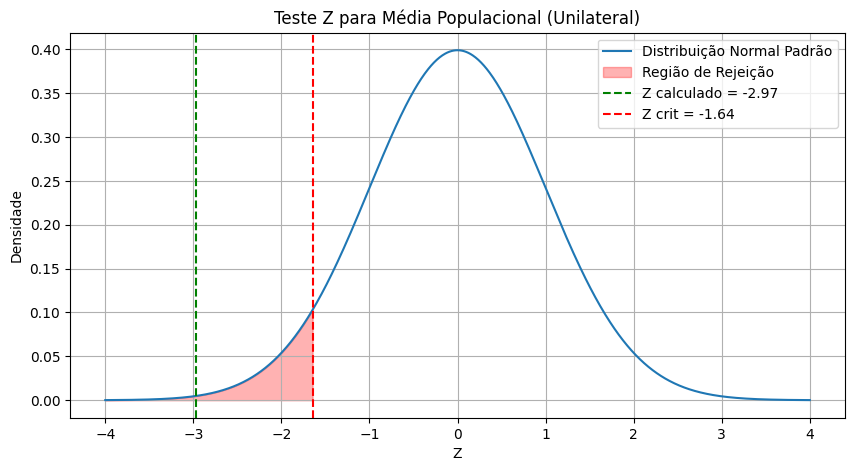

{'Teste': 'Z Média Populacional',
 'Média': 189.94857142857143,
 'Z_calculado': -2.973252668134922,
 'Z_critico': -1.6448536269514729,
 'P_value': 0.0014733088908334489,
 'Nivel_significancia': 0.05,
 'Rejeita_H0': 'Rejeitar H0',
 'Conclusão': 'A amostra não provém de uma população com determinada média 200'}

In [113]:
amostra = [185.6, 192.3, 188.7, 194.1, 187.2, 191.5, 189.8, 193.4, 186.9, 190.7,
            188.1, 192.8, 187.5, 191.2, 189.3, 193.9, 186.4, 190.1, 188.6, 192.1,
            187.8, 191.7, 189.1, 193.2, 186.7, 190.4, 188.3, 192.6, 187.1, 191.9,
            189.6, 193.7, 186.2, 190.9, 188.8]

teste_z_media_populacional(amostra, 200, 20, 'Unilateral')

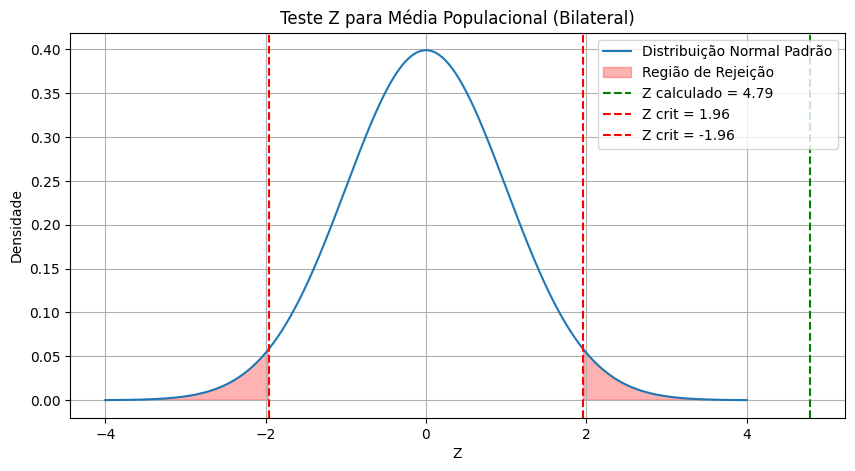

{'Teste': 'Z Média Populacional',
 'Média': 84.08250000000001,
 'Z_calculado': 4.78689780807989,
 'Z_critico': 1.959963984540054,
 'P_value': 1.6937902342917255e-06,
 'Nivel_significancia': 0.05,
 'Rejeita_H0': 'Rejeitar H0',
 'Conclusão': 'A amostra não provém de uma população com determinada média 75'}

In [114]:
amostra = [82.7, 85.3, 83.9, 86.1, 82.4, 84.8, 83.2, 85.7, 82.1, 84.3,
            83.6, 85.9, 82.8, 84.5, 83.1, 86.3, 82.5, 84.7, 83.4, 85.8,
            82.3, 84.9, 83.7, 86.0, 82.6, 84.4, 83.3, 85.6, 82.2, 84.6,
            83.8, 86.2, 82.9, 84.2, 83.5, 85.4, 82.0, 84.1, 83.0, 85.5]

teste_z_media_populacional(amostra, 75, 12, 'Bilateral')

### Teste t de Student para a Média Populacional (σ desconhecido)

O **teste t de Student** é utilizado quando:

- Uma amostra aleatória de tamanho $n$ é extraída de uma população com distribuição aproximadamente normal;  
- A **média populacional ($\mu$) é desconhecida**;  
- O **desvio-padrão populacional ($\sigma$) também é desconhecido**, sendo necessário estimá-lo a partir da amostra.

#### Hipóteses do teste (bilateral)

Para um teste bilateral, as hipóteses são:

$$
H_0: \mu = \mu_0
$$

$$
H_1: \mu \neq \mu_0
$$

#### Estatística do teste

A estatística do teste é baseada na **média amostral** $\bar{X}$ e no **desvio-padrão amostral** $S$:

$$
t_{calc} = \frac{\bar{X} - \mu_0}{S_{\bar{X}}} \sim t_{n-1}
$$

onde:

$$
S_{\bar{X}} = \frac{S}{\sqrt{n}}
$$

- $S$ → desvio-padrão da amostra  
- $n-1$ → **graus de liberdade** do teste  

#### Valores críticos e região de rejeição

Os **valores críticos** $t_c$ podem ser obtidos a partir de **tabelas t de Student**:

- Para um **teste unilateral à direita**:

$$
P(t_{calc} > t_c) = \alpha
$$

- Para um **teste bilateral**:

$$
P(t_{calc} > t_c) = \frac{\alpha}{2}, \quad \text{pois } P(t_{calc} < -t_c) + P(t_{calc} > t_c) = \alpha
$$

A hipótese nula $H_0$ é **rejeitada** se:

$$
t_{calc} < -t_c \quad \text{ou} \quad t_{calc} > t_c
$$

Caso contrário, **não rejeitamos $H_0$**.

#### P-valor

O **p-valor** pode ser obtido a partir da tabela t ou de funções estatísticas em software:

- Para um **teste unilateral**: $P = P_1$  
- Para um **teste bilateral**: $P = 2 \cdot P_1$  

**Regra de decisão:** rejeitar $H_0$ se $P \leq \alpha$.

In [ ]:
import numpy as np
import scipy.stats as stats


def teste_t_student(media_amostral, desvio_padrao_amostral, n, u0, alpha=0.05, tipo='bilateral'): #alpha é a significancia

    # Calcular a estatística t
    t_calculado = (media_amostral - u0) / (desvio_padrao_amostral / np.sqrt(n))

    # Graus de liberdade
    gl = n - 1

    # Calcular o p-valor baseado no tipo de teste
    if tipo == 'bilateral':
        p_valor = 2 * (1 - stats.t.cdf(abs(t_calculado), gl)) #stats.t.cdf dá a função de distribuição acumulada da distribuição t de student
    elif tipo == 'menor':
        p_valor = stats.t.cdf(t_calculado, gl)
    elif tipo == 'maior':
        p_valor = 1 - stats.t.cdf(t_calculado, gl)
    else:
        raise ValueError("Tipo deve ser 'bilateral', 'menor' ou 'maior'")

    # Encontrar o valor crítico
    if tipo == 'bilateral':
        t_critico = stats.t.ppf(1 - alpha/2, gl) #stats t.ppf inverso da cdf, retorna um x tal que a área a esquerda seja p
    elif tipo == 'menor':
        t_critico = stats.t.ppf(alpha, gl)
    elif tipo == 'maior':
        t_critico = stats.t.ppf(1 - alpha, gl)

    # Tomar decisão
    rejeita_H0 = p_valor < alpha

    # Construir conclusão
    if tipo == 'bilateral':
        conclusao = f"A média da população é diferente de {u0}" if rejeita_H0 else f"Não há evidências de que a média da população seja diferente de {u0}"
    elif tipo == 'menor':
        conclusao = f"A média da população é menor que {u0}" if rejeita_H0 else f"Não há evidências de que a média da população seja menor que {u0}"
    elif tipo == 'maior':
        conclusao = f"A média da população é maior que {u0}" if rejeita_H0 else f"Não há evidências de que a média da população seja maior que {u0}"

    return {
        'Média amostral': float(media_amostral),
        'Desvio padrão amostral': float(desvio_padrao_amostral),
        'Tamanho da amostra (n)': n,
        'μ₀': u0,
        't calculado': float(t_calculado),
        'Graus de liberdade': gl,
        't crítico': float(t_critico),
        'P-valor': float(p_valor),
        'Nível de significância (α)': alpha,
        'Rejeita H₀': 'Sim' if rejeita_H0 else 'Não',
        'Conclusão': conclusao
    }

Resultado do teste t de Student para o exemplo:
Média amostral: 16.808
Desvio padrão amostral: 2.733
Tamanho da amostra (n): 25
μ₀: 18
t calculado: -2.1807537504573733
Graus de liberdade: 24
t crítico: -2.4921594731575762
P-valor: 0.01961718370694039
Nível de significância (α): 0.01
Rejeita H₀: Não
Conclusão: Não há evidências de que a média da população seja menor que 18


## Exemplos

Exemplo base:

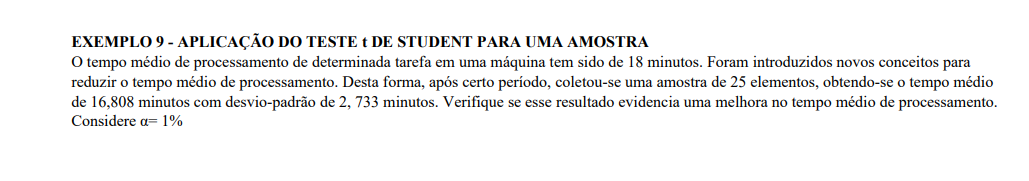

In [ ]:
resultado = teste_t_student(
    media_amostral=16.808,
    desvio_padrao_amostral=2.733,
    n=25,
    u0=18,
    alpha=0.01,
    tipo='menor'
)

print("Resultado do teste t de Student para o exemplo:")
for chave, valor in resultado.items():
    print(f"{chave}: {valor}")

Exemplo 2: O tempo médio de atendimento em um call center é de 12 minutos. Um novo sistema foi implantado para reduzir esse tempo. Após um mês, coletou-se uma amostra de 20 atendimentos, obtendo-se um tempo médio de 10,9 minutos com desvio-padrão de 1,8 minutos. Verifique se esse resultado evidencia uma redução no tempo médio de atendimento. Considere α = 5%.

In [ ]:
resultado = teste_t_student(
    media_amostral=10.9,
    desvio_padrao_amostral=1.8,
    n=20,
    u0=12,
    alpha=0.05,
    tipo='menor'
)

print("Resultado do teste t de Student para o exemplo:")
for chave, valor in resultado.items():
    print(f"{chave}: {valor}")

Exemplo 3: A vida útil média de um tipo de lâmpada é de 1500 horas. Um novo processo de fabricação promete aumentar essa vida útil. Testando-se 30 lâmpadas desse novo processo, obteve-se uma média de 1555 horas e desvio-padrão de 120 horas. Verifique se há evidências de aumento na vida útil das lâmpadas. Considere α = 1%.

In [ ]:
resultado = teste_t_student(
    media_amostral=1555,
    desvio_padrao_amostral=120,
    n=30,
    u0=1500,
    alpha=0.01,
    tipo='maior'
)

print("Resultado do teste t de Student para o exemplo:")
for chave, valor in resultado.items():
    print(f"{chave}: {valor}")

Exemplo 4: O peso médio de um saco de arroz produzido por uma máquina é de 5 kg. Após ajustes no equipamento, coletou-se uma amostra de 16 sacos, obtendo-se peso médio de 5,12 kg e desvio-padrão de 0,18 kg. Teste se há evidência de que o peso médio está diferente de 5 kg. Considere α = 5%

In [ ]:
resultado = teste_t_student(
    media_amostral=5.12,
    desvio_padrao_amostral=0.18,
    n=16,
    u0=5,
    alpha=0.05,
    tipo='bilateral'
)

print("Resultado do teste t de Student para o exemplo:")
for chave, valor in resultado.items():
    print(f"{chave}: {valor}")

Exemplo 5: A nota média de uma disciplina costuma ser 70 pontos. Após a adoção de uma nova metodologia de ensino, coletou-se uma amostra de 40 alunos, com média de 72,5 pontos e desvio-padrão de 6,8 pontos. Verifique se esse resultado evidencia um aumento na média das notas. Considere α = 10%.

In [ ]:
resultado = teste_t_student(
    media_amostral=72.5,
    desvio_padrao_amostral=6.8,
    n=40,
    u0=70,
    alpha=0.1,
    tipo='maior'
)

print("Resultado do teste t de Student para o exemplo:")
for chave, valor in resultado.items():
    print(f"{chave}: {valor}")

# Teste t de Student para comparação de duas médias populacionais a partir de duas amostras aleatórias independentes

Esse teste é usado para verificar se a diferença entre as médias amostrais é estatisticamente significativa ou se pode ter acontecido apenas por acaso

## Caso 1: Quando as variâncias são diferentes (Welch)

Formula para Tcalc:

$$
T_{\mathrm{calc}} = \frac{\overline{X}_1 - \overline{X}_2}
{\sqrt{\frac{S_1^2}{n_1} + \frac{S_2^2}{n_2}}}
$$



Formula para o numero de graus de liberdade:

$$
\nu =
\dfrac{\left( \dfrac{S_{1}^{2}}{n_{1}} + \dfrac{S_{2}^{2}}{n_{2}} \right)^{2}}
{\dfrac{\left( \dfrac{S_{1}^{2}}{n_{1}} \right)^{2}}{n_{1}-1}
+ \dfrac{\left( \dfrac{S_{2}^{2}}{n_{2}} \right)^{2}}{n_{2}-1}}
$$


## Caso 2: Quando as variâncias são iguais (Pooled):


Formula para Tcalc:

$$
T_{calc} = \frac{\overline{X}_1 - \overline{X}_2}{S_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$

Formula para o numero de graus de liberdade:

$$
S_p = \sqrt{\frac{(n_1 - 1)S_1^2 + (n_2 - 1)S_2^2}{n_1 + n_2 - 2}}
$$


Para calcular se vai utilizar o caso 1 ou 2 a gente aplica uma função do scipy que faz o teste de Levene, que verifica se 2 variancias provenientes de dados com distribuições continuas são iguais

Formula teste de Levene:

$$
L = \frac{(N-k) \sum_{i=1}^{k} N_i \left( \overline{V}_i - \overline{V} \right)^2}
{(k-1) \sum_{i=1}^{k} \sum_{j=1}^{N_i} \left( V_{ij} - \overline{V}_i \right)^2}
$$

In [ ]:
import numpy as np
import scipy.stats as stats

def teste_t_duas_amostras(amostra1, amostra2, alpha=0.05, tipo='bilateral'):
    # Tamanho, médias e desvios
    n1, n2 = len(amostra1), len(amostra2)
    mean1, mean2 = np.mean(amostra1), np.mean(amostra2)
    std1, std2 = np.std(amostra1, ddof=1), np.std(amostra2, ddof=1)

    # Teste de Levene para igualdade de variâncias
    stat_var, p_var = stats.levene(amostra1, amostra2)
    variancias_iguais = p_var > alpha

    # Caso 1: variâncias iguais (pooled)
    if variancias_iguais:
        sp = np.sqrt(((n1-1)*std1**2 + (n2-1)*std2**2) / (n1+n2-2))
        t_calc = (mean1 - mean2) / (sp * np.sqrt(1/n1 + 1/n2))
        gl = n1 + n2 - 2
        caso = "Variâncias iguais (pooled)"
    else:
        # Caso 2: variâncias diferentes (Welch)
        s1, s2 = std1**2, std2**2
        t_calc = (mean1 - mean2) / np.sqrt(s1/n1 + s2/n2)
        num = (s1/n1 + s2/n2)**2
        den = ((s1/n1)**2 / (n1-1)) + ((s2/n2)**2 / (n2-1))
        gl = num / den
        caso = "Variâncias diferentes (Welch)"

    # Cálculo do p-valor
    if tipo == 'bilateral':
        p_val = 2 * (1 - stats.t.cdf(abs(t_calc), gl))
    elif tipo == 'menor':
        p_val = stats.t.cdf(t_calc, gl)
    elif tipo == 'maior':
        p_val = 1 - stats.t.cdf(t_calc, gl)
    else:
        raise ValueError("Tipo deve ser 'bilateral', 'menor' ou 'maior'")

    # Valor crítico
    if tipo == 'bilateral':
        t_critico = stats.t.ppf(1 - alpha/2, gl)
    elif tipo == 'menor':
        t_critico = stats.t.ppf(alpha, gl)
    elif tipo == 'maior':
        t_critico = stats.t.ppf(1 - alpha, gl)

    # Decisão
    rejeita_H0 = p_val < alpha

    # Conclusão textual
    if tipo == 'bilateral':
        conclusao = "As médias são diferentes (rejeita H₀)" if rejeita_H0 else "Não há evidência de diferença entre as médias (não rejeita H₀)"
    elif tipo == 'menor':
        conclusao = "μ1 < μ2 (rejeita H₀)" if rejeita_H0 else "Não há evidência de que μ1 < μ2"
    elif tipo == 'maior':
        conclusao = "μ1 > μ2 (rejeita H₀)" if rejeita_H0 else "Não há evidência de que μ1 > μ2"

    return {
        'Média amostra 1': float(mean1),
        'Média amostra 2': float(mean2),
        'Desvio padrão amostra 1': float(std1),
        'Desvio padrão amostra 2': float(std2),
        'Tamanho n1': n1,
        'Tamanho n2': n2,
        't calculado': float(t_calc),
        'Graus de liberdade': float(gl),
        't crítico': float(t_critico),
        'P-valor': float(p_val),
        'Nível de significância (α)': alpha,
        'Rejeita H₀': 'Sim' if rejeita_H0 else 'Não',
        'Conclusão': conclusao,
        'Caso aplicado': caso,
        'P-valor teste de Levene (variâncias)': float(p_var)
    }

Média amostra 1: 24.246666666666666
Média amostra 2: 27.530000000000005
Desvio padrão amostra 1: 1.3035054417920966
Desvio padrão amostra 2: 1.248488741611647
Tamanho n1: 30
Tamanho n2: 30
t calculado: -9.963456353489718
Graus de liberdade: 58.0
t crítico: 2.0017174841452356
P-valor: 3.554492340403296e-14
Nível de significância (α): 0.05
Rejeita H₀: Sim
Conclusão: As médias são diferentes (rejeita H₀)
Caso aplicado: Variâncias iguais (pooled)
P-valor teste de Levene (variâncias): 0.8080839462958502


## Exemplos:

Exemplo base: Um engenheiro de qualidade desconfia que o tempo médio de fabricação de determinado produto plástico pode depender da matéria-prima
utilizada que é proveniente de dois fornecedores. Uma amostra com 30 observações de cada fornecedor é coletada para teste e os resultados são
apresentados nas Tabelas 7 .10 e 7.11. Para onível de significância α = 5%, verifique se há diferença entre as médias.

In [ ]:
fornecedor1 = [22.8, 23.4, 26.2, 24.3, 22.0, 24.8, 26.7, 25.1, 23.1, 22.8,
    25.6, 25.1, 24.3, 24.2, 22.8, 23.2, 24.7, 25.6, 24.5, 23.6,
    23.9, 22.8, 25.4, 26.7, 22.9, 23.5, 23.8, 24.6, 26.3, 22.7]

fornecedor2 = [26.8, 29.3, 28.4, 25.6, 29.4, 27.2, 27.6, 26.8, 25.4, 28.6,
    29.7, 27.2, 27.9, 28.4, 26.0, 26.8, 27.5, 28.5, 27.3, 29.1,
    29.2, 25.7, 28.4, 28.6, 27.9, 27.4, 26.7, 26.8, 25.6, 26.1]

resultado = teste_t_duas_amostras(fornecedor1, fornecedor2, alpha=0.05, tipo='bilateral')

print("Resultado do Teste t")
for chave, valor in resultado.items():
    print(f"{chave}: {valor}")


Exemplo 2: Dois fornecedores entregam lotes de um mesmo componente. Queremos testar se a média do fornecedor A é diferente da média do fornecedor B (teste bilateral, α=0.05).

Gera amostras normais com médias próximas e desvios parecidos.

In [ ]:
np.random.seed(1)
fornecedorA = np.random.normal(loc=24.0, scale=2.0, size=30)
fornecedorB = np.random.normal(loc=26.0, scale=2.0, size=30)

print("=== EXEMPLO 2 ===")
res1 = teste_t_duas_amostras(fornecedorA, fornecedorB, alpha=0.05, tipo='bilateral')
for k, v in res1.items():
    print(f"{k}: {v}")

Exemplo 3:
Pequenas amostras de dois processos; suspeita-se que o processo 1 tenha média MAIOR que o processo 2. Fazemos teste unilateral (H1: μ1 > μ2), α=0.05.
Variâncias intencionalmente diferentes.

In [ ]:
np.random.seed(2)
proc1 = np.random.normal(loc=50.0, scale=5.0, size=8)   # menor n, menor sd
proc2 = np.random.normal(loc=55.0, scale=10.0, size=10) # n ligeiramente maior, maior sd

print("=== EXEMPLO 3 ===")
res2 = teste_t_duas_amostras(proc1, proc2, alpha=0.05, tipo='maior')
for k,v in res2.items(): print(f"{k}: {v}")
print("\n")

Exemplo 4: Grandes amostras (diferença pequena) Com muitas observações, mesmo pequenas diferenças de média podem ser detectadas. Teste bilateral α=0.05.

In [ ]:
np.random.seed(4)
grupo1 = np.random.normal(loc=10.0, scale=1.5, size=200)
grupo2 = np.random.normal(loc=10.4, scale=1.5, size=200)

print("=== EXEMPLO 4 ===")
res4 = teste_t_duas_amostras(grupo1, grupo2, alpha=0.05, tipo='bilateral')
for k,v in res4.items(): print(f"{k}: {v}")
print("\n")

Exemplo 5: Dados não-normais (exponencial) — mostra robustez do teste (Welch)
Amostras de distribuição assimétrica (exponencial). Teste bilateral α=0.05.

In [ ]:
np.random.seed(5)
exp1 = np.random.exponential(scale=1.0, size=25) 
exp2 = np.random.exponential(scale=1.3, size=25) 

print("=== EXEMPLO 5 ===")
res5 = teste_t_duas_amostras(exp1, exp2, alpha=0.05, tipo='bilateral')
for k,v in res5.items(): print(f"{k}: {v}")
print("\n")